<a href="https://www.kaggle.com/code/aslhanyolda/asl-han-yoldas-women-in-datathon-up-school?scriptVersionId=173605265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Why Women's Labor Force Participation is Lower Than Men's

## Purpose
- The purpose of this analysis is to scrutinize the labor force participation of women in comparison to men using data-driven approaches. 

- It involves an examination of the disparity between genders in labor force participation and employment rates, followed by an exploration of the underlying reasons for this gap.


## Finalist in  Women In Datathon (Up School & Bitexen)

🎉 I am proud to announce that my project was selected as one of the final 6 projects in Women in Datathon! 

# 1. Data Set Review & Description
- Initial examination of datasets
- Assessment of data distribution
- Basic statistical analysis
- Handling missing values
- Handling outliers

# 2. Deep Data
- Visualization of data for intuitive understanding
- Exploration of relationships between variables

# 3. Analysis Constraints
- Focus on employment and labor force participation discrepancies between men and women
- Examination of factors contributing to women's lower participation in the labor force
- Comparative analysis of countries with high and very high Human Development Index (HDI) from the 1980s to present

# 4. Data Analysis and Interpretation

Based on the analysis conducted, several key insights have emerged:

- Gender Disparity in Labor Force Participation: Across countries with diverse HDI levels, female participation in the labor force consistently lags behind that of males, despite gradual improvements over time.

- Gender Inequality in Employment: Female employment rates remain inferior to those of males, indicating systemic gender biases in hiring practices favoring men and resulting in a significant proportion of women being unemployed.

- Wage Disparities: Analysis of income datasets reveals unequal pay for equal work, reflecting pervasive gender wage gaps and highlighting the challenges faced by women in securing fair employment opportunities.

- Cultural Norms and Unpaid Care Work: Women are disproportionately burdened with unpaid care work, perpetuating societal expectations that prioritize household responsibilities over paid employment and exacerbating gender disparities in the labor force.

- Fertility and Labor Force Participation: Negative correlations between fertility rates and female labor force participation suggest that family obligations influence women's employment decisions, further impacting gender equality in the workforce.

- Cultural Barriers: Despite progress, cultural norms persist in some regions, such as Turkey, where certain jobs are deemed unsuitable for women, discouraging their pursuit of diverse career paths and perpetuating gender inequalities.

- In summary, gender inequalities, cultural norms, and the burden of unpaid care work collectively contribute to the underrepresentation of women in the workforce compared to men. Addressing these systemic issues is crucial for achieving gender parity in employment opportunities.



### Data
For two step analysis the datasets that are used noted down below. I added data to strengthen the analysis.

#### Female - Male Labor Force Participation and Employment Datasets:
- Labor Participation Rates
- Labor Force Participation (Female and Male)
- female employment to population (Added dataset) (https://ourworldindata.org/grapher/female-employment-to-population-ratio)
- share of male vs female employment (Added dataset)(https://ourworldindata.org/grapher/share-of-male-vs-female-employment-in-industry)

#### Why Women Participate in the Labor Force Less Than Men Datasets:
- Gender gap-wage
- share-of-women-in-top-income-groups
- unpaid-care-work
- fertility labor force
- woman can take the same jobs (Added dataset) (https://ourworldindata.org/grapher/women-can-take-the-same-jobs-as-men)

For constraining data I added:
- human-development-index-(hdi)-by-country (https://worldpopulationreview.com/country-rankings/hdi-by-country)

The dataset I didn't use

- Women Ent_Data3,Labor Force-Women Entrpreneurship (same data) : because it focuses on Entrpreneurship I want to look at the topic more generally
- Placment : because it is about education, exams and either that person placed in a job. It is only in few countries and it has small data. From some analyzing i did males placement much higher than females. Also data mostly contains male data
- Maternal Mortality : It shows birth related deaths. The ratio decreased comparing the past. 

In [1]:
#----------------------------------
#Importing Libraries
#----------------------------------
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import math
KAGGLE_DIR = '/kaggle/input/up-school-women-in-datathon-dataset/'
EXTRA_DIR = '/kaggle/input/extra-datasets/'


In [2]:
#----------------------------------
#Functions 
#----------------------------------
def read_csv(csv_url,file_dir = KAGGLE_DIR):
    print(KAGGLE_DIR + csv_url)
    return pd.read_csv(file_dir + csv_url)

def is_null(df):
    return df.isnull().sum().sort_values(ascending=False)

def outlier_thresholds(df, col_name, q1 = 0.05, q3 = 0.95 ):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * interquantile_range
    lower_limit = quartile1- 1.5 * interquantile_range
    return lower_limit,upper_limit

def get_outliers(df, col_name):
    # get outlier thresholds
    low, up = outlier_thresholds(df, col_name)
    # Return the outliers
    return df.loc[((df[col_name] < low) | (df[col_name] > up)), col_name]

def column_name_replace_space(columns):
    return [col.replace(' ','_') for col in columns]

def constrain_dataset(df,selected_countries):
    try:
        return  df[df.Entity.isin(selected_countries)].query('Year>=1980').reset_index(drop=True)
    except:
        return  df[df.Country.isin(selected_countries)].query('Year>=1980').reset_index(drop=True)



In [3]:
#----------------------------------
#Load All the Datasets 
#----------------------------------
df_unpaid_care_work = read_csv('1- female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv')
df_unpaid_care_work_2 = read_csv('4- female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv')
df_income = read_csv('2- share-of-women-in-top-income-groups.csv')
df_gender_wage = read_csv('6- gender-gap-in-average-wages-ilo.csv')
df_ratio_labor = read_csv('3- ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv')
df_labor_female = read_csv('Labour Force Participation Female.csv')
df_labor_male = read_csv('Labour Force Participation - Male.csv')

## Extra Datsets
df_hdi= read_csv('human-development-index-(hdi)-by-country-2024.csv',file_dir=EXTRA_DIR)
df_female_employmennt =read_csv('female-employment-to-population-ratio.csv',file_dir=EXTRA_DIR)
df_share_of_male_female_employment = read_csv('share-of-male-vs-female-employment-in-industry.csv',file_dir=EXTRA_DIR)
df_woman_can_get_same_jobs = read_csv('women-can-take-the-same-jobs-as-men.csv',file_dir=EXTRA_DIR)
df_fertility = read_csv('fertility-and-female-labor-force-participation.csv',file_dir=EXTRA_DIR)


/kaggle/input/up-school-women-in-datathon-dataset/1- female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv
/kaggle/input/up-school-women-in-datathon-dataset/4- female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv
/kaggle/input/up-school-women-in-datathon-dataset/2- share-of-women-in-top-income-groups.csv
/kaggle/input/up-school-women-in-datathon-dataset/6- gender-gap-in-average-wages-ilo.csv
/kaggle/input/up-school-women-in-datathon-dataset/3- ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv
/kaggle/input/up-school-women-in-datathon-dataset/Labour Force Participation Female.csv
/kaggle/input/up-school-women-in-datathon-dataset/Labour Force Participation - Male.csv
/kaggle/input/up-school-women-in-datathon-dataset/human-development-index-(hdi)-by-country-2024.csv
/kaggle/input/up-school-women-in-datathon-dataset/female-employment-to-population-ratio.csv
/kaggle/input/up-school-women-in-datathon-dataset/share-of-male-vs-female-employment-in-industry.csv


In [4]:
# It seems two datasets are the same 
# Because there is one null value code returns false
(df_unpaid_care_work_2 == df_unpaid_care_work).all()

Entity                                                                     True
Code                                                                      False
Year                                                                       True
Female to male ratio of time devoted to unpaid care work (OECD (2014))     True
dtype: bool

In [5]:
del df_unpaid_care_work_2

### Changing column names for readability

In [6]:
df_ratio_labor = df_ratio_labor.rename(columns={"Ratio of female to male labor force participation rate (%) (modeled ILO estimate)": "ratio_of_f_to_m_labor_force_participation_rate"})
df_labor_male.columns =[col.replace(r"Labour force participation rate, male (% ages 15 and older) ","") for col in df_labor_male.columns]
df_labor_female.columns =[col.replace(r"Labour force participation rate, female (% ages 15 and older) ","") for col in df_labor_female.columns]
df_female_employmennt = df_female_employmennt.rename(columns={"Employment to population ratio, 15+, female (%) (national estimate)": "ratio_of_female_employment_to_population"})
df_share_of_male_female_employment = df_share_of_male_female_employment.rename(columns={
    "Employment in industry, male (% of male employment) (modeled ILO estimate)": "employement_percentage_male",
    "Employment in industry, female (% of female employment) (modeled ILO estimate)": "employement_percentage_female"
    
    })
df_gender_wage.columns = column_name_replace_space(df_gender_wage.columns)
df_woman_can_get_same_jobs = df_woman_can_get_same_jobs.rename(columns={
    "A woman can get a job in the same way as a man (1=yes; 0=no)": "a_woman_can_get_a_job_in_the_same_way"})
df_fertility =df_fertility.rename(
    columns={
        'Labor force participation rate, female (% of female population ages 15+) (national estimate)':	'Labor_force_participation_rate',
        'Fertility rate - Sex: all - Age: all - Variant: estimates':'Fertility_rate',
        'Population (historical estimates)':'Population'
    })
df_unpaid_care_work = df_unpaid_care_work.rename(columns={"Female to male ratio of time devoted to unpaid care work (OECD (2014))": "f_to_m_unpaid_care_work_ratio"})
df_income = df_income.rename(columns=
    {
"Share of women in top 0.25%": "share_of_women_top_0.25%",   
"Share of women in top 0.5%" : "share_of_women_top_0.5%",      
"Share of women in top 0.1%" : "share_of_women_top_0.1%",    
"Share of women in top 1%"   : "share_of_women_top_1%",       
"Share of women in top 10%"  : "share_of_women_top_10%",      
"Share of women in top 5%"   : "share_of_women_top_5%"})

## Constrain Dataset

- Subject : Employment of women , Labor Force of Women
- Why are women not employed more ? Inequalites in Employement based on Gender
- HDI Rank Very High-High, Between 1980 - Today
- Now we analyze datasets with this limitations


In [7]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  189 non-null    object 
 1   HdiTier  188 non-null    object 
 2   Hdi2021  189 non-null    float64
 3   Hdi2020  189 non-null    float64
 4   Hdi2019  189 non-null    float64
 5   Hdi2010  187 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.0+ KB


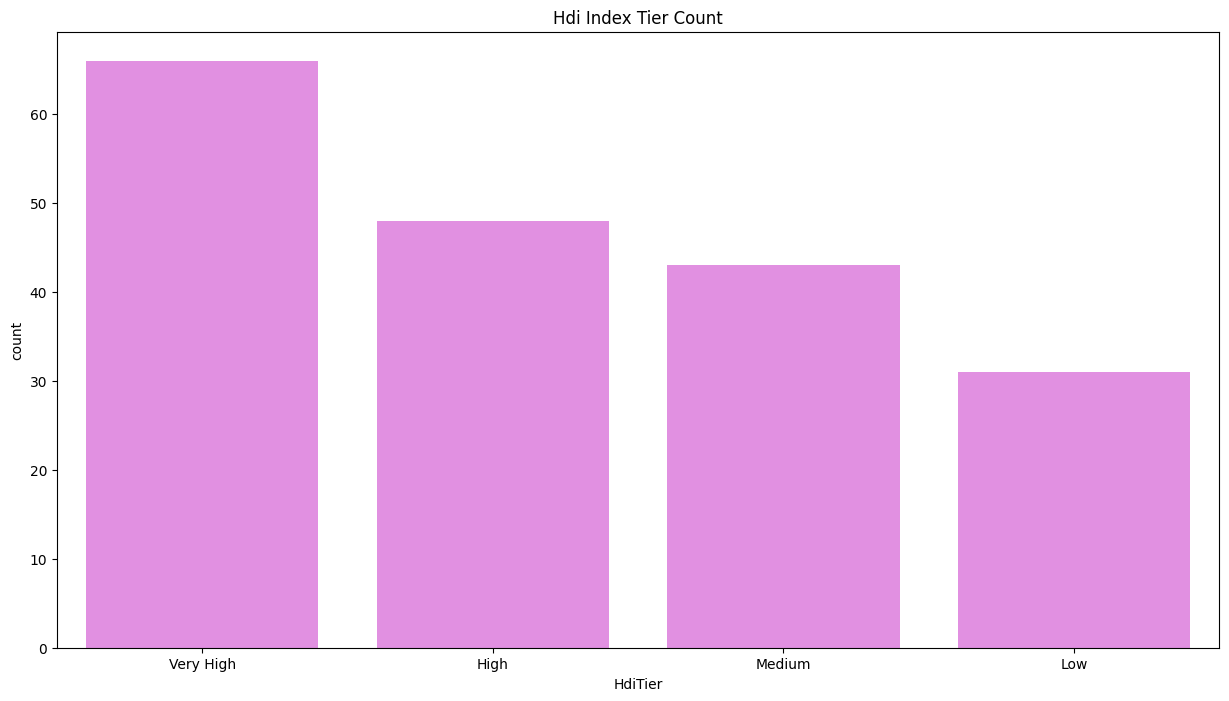

In [8]:
# We limited dataset to high and very high HDI index
#> 0.80 -> Very High
#> 0.70 -> High
#> 0.60 -> Medium
#> 0.50 -> Low
plt.figure(figsize=(15,8))
plt.title('Hdi Index Tier Count')
plt.xlabel('Hdi Tier')
sns.countplot(x=df_hdi['HdiTier'], color='violet', orient='v', order = ['Very High', 'High', 'Medium', 'Low'])
plt.show()

In [9]:
# 114 Countries in selected countries
df_hdi[(df_hdi['HdiTier']=='Very High') | (df_hdi['HdiTier']=='High')].describe()

,Hdi2021,Hdi2020,Hdi2019,Hdi2010
count,114.000000,114.000000,114.000000,113.000000
mean,0.824289,0.824509,0.831500,0.797168
std,0.079738,0.077661,0.076197,0.079302
min,0.703000,0.703000,0.703000,0.656000
25%,0.758250,0.757250,0.768750,0.728000
50%,0.809500,0.815500,0.819000,0.788000
75%,0.895750,0.893500,0.897000,0.868000
max,0.962000,0.959000,0.962000,0.942000


In [10]:
selected_countries = df_hdi[(df_hdi['HdiTier']=='Very High') | (df_hdi['HdiTier']=='High')]['country']

In [11]:
# Getting the constrained dataset
df_ratio_labor = constrain_dataset(df_ratio_labor,selected_countries)
df_female_employmennt = constrain_dataset(df_female_employmennt,selected_countries)
df_share_of_male_female_employment = constrain_dataset(df_share_of_male_female_employment,selected_countries)
df_gender_wage = constrain_dataset(df_gender_wage,selected_countries)
df_woman_can_get_same_jobs =constrain_dataset(df_woman_can_get_same_jobs,selected_countries)
df_fertility = constrain_dataset(df_fertility, selected_countries).drop(columns=['Continent'],axis=1)
df_income =constrain_dataset(df_income,selected_countries)
df_unpaid_care_work = constrain_dataset(df_unpaid_care_work,selected_countries)


## Data Set Review & Description

### Female - Male Labor Force Participation and Employment Datasets
### 1. Labor Participation (Female and Male) 

- The labor force is the number of people who are employed plus the unemployed who are looking for work.

- Labor Force Participation Rate: It indicates the percentage of people who are either currently employed or are unemployed but actively looking for work.

- The labor force participation rate is the proportion of the population aged 15 years and older that is economically active.

- This ratio is calculated by dividing the labor force participation rate among women, by the corresponding rate for men.


- Female to Male Ratio: The ratio of female to male labor force participation rate calculates the proportion of females participating in the labor force relative to males.

- If the ratio is greater than 100, it indicates that a higher proportion of females are participating in the labor force compared to males. This might suggest a higher level of gender equality or a greater need for females to contribute to the labor force in that particular context.

- If the ratio is less than 100, it indicates that a lower proportion of females are participating in the labor force compared to males. This could suggest gender disparities or cultural, social, or economic factors that limit female participation in the labor force.

- If the ratio is equal to 100, it suggests that there is gender parity in labor force participation, meaning that the proportions of females and males participating in the labor force are equal.

- Hemisphere: This column categorizes countries based on their geographical hemispheres, such as "Northern Hemisphere" or "Southern Hemisphere."

- HDI Rank (2021): This column represents the Human Development Index (HDI) rank of each country for the year 2021.The HDI is a composite index measuring average achievement in three basic dimensions of human development: health (life expectancy at birth), education (mean years of schooling and expected years of schooling), and standard of living (gross national income per capita). The HDI is the geometric mean of normalized indices for each of the three dimensions. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher.A lower rank indicates higher human development.

In [12]:
df_ratio_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          3296 non-null   object 
 1   Code                                            3296 non-null   object 
 2   Year                                            3296 non-null   int64  
 3   ratio_of_f_to_m_labor_force_participation_rate  3296 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 103.1+ KB


In [13]:
df_ratio_labor.head()

,Entity,Code,Year,ratio_of_f_to_m_labor_force_participation_rate
0,Albania,ALB,1990,70.837120
1,Albania,ALB,1991,72.830475
2,Albania,ALB,1992,73.305390
3,Albania,ALB,1993,72.635666
4,Albania,ALB,1994,72.074180


In [14]:
# Checking null values
# No null values in the important columns
is_null(df_ratio_labor)

Entity                                            0
Code                                              0
Year                                              0
ratio_of_f_to_m_labor_force_participation_rate    0
dtype: int64

In [15]:
# Checking outliers
# No outliers
get_outliers(df_ratio_labor,'ratio_of_f_to_m_labor_force_participation_rate')


Series([], Name: ratio_of_f_to_m_labor_force_participation_rate, dtype: float64)

In [16]:
# Year between 1990-2021
# The ratio percentange smaller than 100 male labor participation higher than females
# Even the maximum rate lower than hundred which means participation rate not equal
df_ratio_labor.describe()

,Year,ratio_of_f_to_m_labor_force_participation_rate
count,3296.000000,3296.000000
mean,2005.500000,66.984666
std,9.234494,17.245998
min,1990.000000,12.230471
25%,1997.750000,57.366708
50%,2005.500000,70.829072
75%,2013.250000,80.555900
max,2021.000000,94.658910


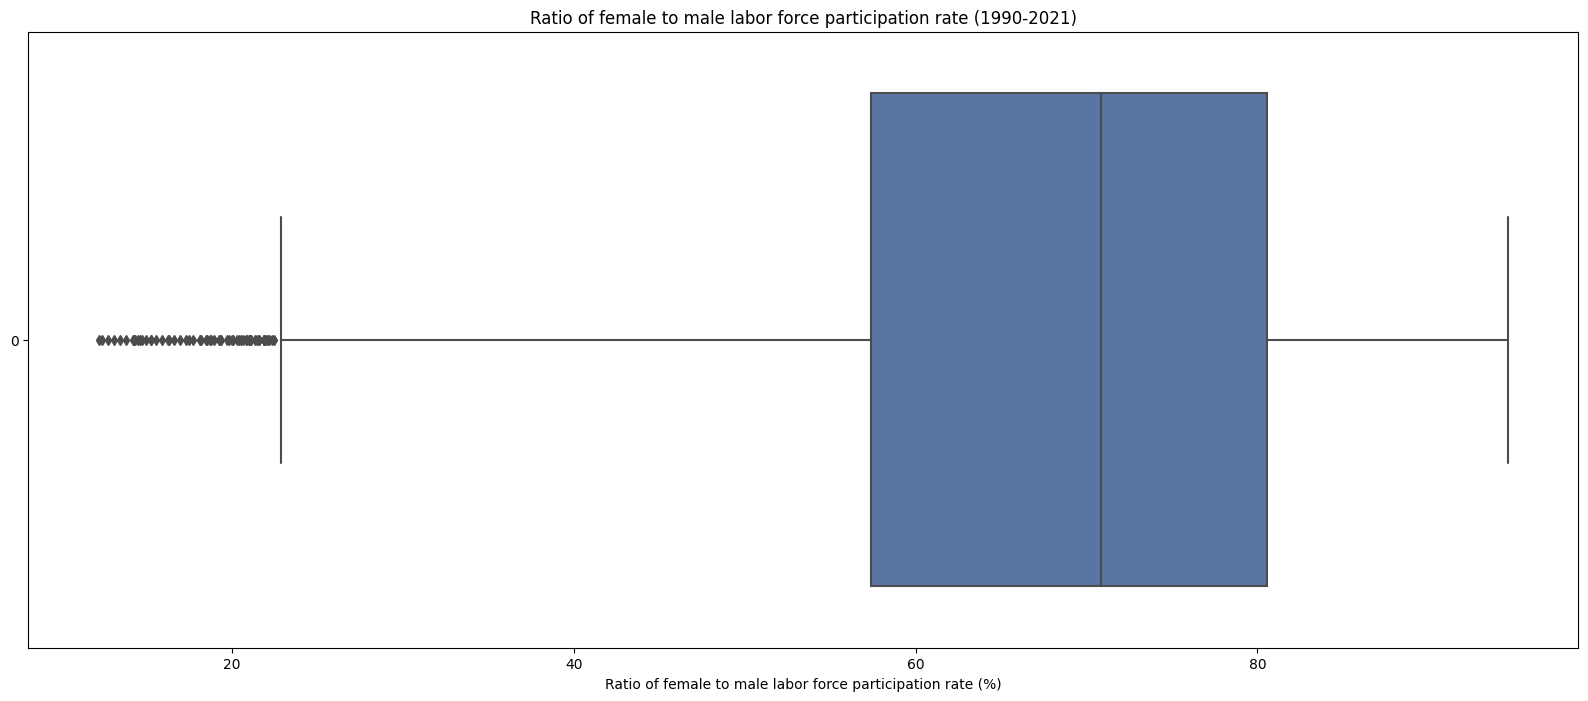

In [17]:
# Most of the data has about 58-80 ratio
# For every hundered men 58-80 women participating labor force
# We can see there is so little data that female participation equal or higher than male participation
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate (1990-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
sns.set_theme(style="darkgrid")
sns.boxplot(df_ratio_labor['ratio_of_f_to_m_labor_force_participation_rate'],orient='h')
plt.show()

In [18]:
# I changed the column name at the beggining for simplicity 
# We can see every year's labour force participation rate data as columns
# We want to deconstruct that add  columns as year and participation rate
df_labor_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ISO3             195 non-null    object 
 1   Country          195 non-null    object 
 2   Continent        195 non-null    object 
 3   Hemisphere       195 non-null    object 
 4   HDI Rank (2021)  191 non-null    float64
 5   (1990)           180 non-null    float64
 6   (1991)           180 non-null    float64
 7   (1992)           180 non-null    float64
 8   (1993)           180 non-null    float64
 9   (1994)           180 non-null    float64
 10  (1995)           180 non-null    float64
 11  (1996)           180 non-null    float64
 12  (1997)           180 non-null    float64
 13  (1998)           180 non-null    float64
 14  (1999)           180 non-null    float64
 15  (2000)           180 non-null    float64
 16  (2001)           180 non-null    float64
 17  (2002)          

In [19]:
# We can see it has same columns as the male data
# We want to merge male and female data
df_labor_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ISO3             195 non-null    object 
 1   Country          195 non-null    object 
 2   Continent        195 non-null    object 
 3   Hemisphere       195 non-null    object 
 4   HDI Rank (2021)  191 non-null    float64
 5   (1990)           180 non-null    float64
 6   (1991)           180 non-null    float64
 7   (1992)           180 non-null    float64
 8   (1993)           180 non-null    float64
 9   (1994)           180 non-null    float64
 10  (1995)           180 non-null    float64
 11  (1996)           180 non-null    float64
 12  (1997)           180 non-null    float64
 13  (1998)           180 non-null    float64
 14  (1999)           180 non-null    float64
 15  (2000)           180 non-null    float64
 16  (2001)           180 non-null    float64
 17  (2002)          

In [20]:
# For changin the structure of datasets we perform melting

# Defining the columns that we want to keep as identifiers
id_columns = ['ISO3', 'Country', 'Continent', 'Hemisphere', 'HDI Rank (2021)']

# Perform melting/unpivoting
df_labor_male_melted = pd.melt(df_labor_male, 
                    id_vars=id_columns, 
                    var_name='Year', 
                    value_name='Labour force participation rate')

df_labor_female_melted = pd.melt(df_labor_female, 
                    id_vars=id_columns, 
                    var_name='Year', 
                    value_name='Labour force participation rate')



In [21]:
# Extract the year from the Year column and convert it to integer
df_labor_male_melted['Year'] = df_labor_male_melted['Year'].str.extract(r"(\d+)").astype(int)
df_labor_female_melted['Year'] = df_labor_female_melted['Year'].str.extract(r"(\d+)").astype(int)

In [22]:
# Before the merge we want to know the data is from male or femlae
# Adding gender as a column
df_labor_female_melted['Gender'] = 'F'
df_labor_male_melted['Gender'] = 'M'


In [23]:
# Merge the datasets
df_labor_force_merged = pd.concat([df_labor_female_melted,df_labor_male_melted])

In [24]:
# Reorder the columns
df_labor_force_merged = df_labor_force_merged[['ISO3', 'Country', 'Year','Continent', 'Hemisphere', 'HDI Rank (2021)', 'Labour force participation rate','Gender']]

# Sort the dataframe by country and year
df_labor_force_merged = df_labor_force_merged.sort_values(by=['Country', 'Year'])


# Change column names
df_labor_force_merged.columns = column_name_replace_space(df_labor_force_merged.columns)

# Reset index
df_labor_force_merged = df_labor_force_merged.reset_index(drop=True)


In [25]:
df_labor_force = constrain_dataset(df_labor_force_merged,selected_countries)


In [26]:
df_labor_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3                             7040 non-null   object 
 1   Country                          7040 non-null   object 
 2   Year                             7040 non-null   int64  
 3   Continent                        7040 non-null   object 
 4   Hemisphere                       7040 non-null   object 
 5   HDI_Rank_(2021)                  7040 non-null   float64
 6   Labour_force_participation_rate  6464 non-null   float64
 7   Gender                           7040 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.1+ KB


In [27]:
df_labor_force.head()

,ISO3,Country,Year,Continent,Hemisphere,HDI_Rank_(2021),Labour_force_participation_rate,Gender
0,ALB,Albania,1990,Europe,Northern Hemisphere,67.0,51.364,F
1,ALB,Albania,1990,Europe,Northern Hemisphere,67.0,72.510,M
2,ALB,Albania,1991,Europe,Northern Hemisphere,67.0,54.727,F
3,ALB,Albania,1991,Europe,Northern Hemisphere,67.0,75.143,M
4,ALB,Albania,1992,Europe,Northern Hemisphere,67.0,55.608,F


In [28]:
# There are missing values 
is_null(df_labor_force)

Labour_force_participation_rate    576
ISO3                                 0
Country                              0
Year                                 0
Continent                            0
Hemisphere                           0
HDI_Rank_(2021)                      0
Gender                               0
dtype: int64

In [29]:
# Looking which countries has the null values
df_labor_force[df_labor_force['Labour_force_participation_rate'].isnull()]['Country'].unique()

array(['Andorra', 'Antigua and Barbuda', 'Dominica', 'Grenada',
       'Liechtenstein', 'Palau', 'Saint Kitts and Nevis', 'San Marino',
       'Seychelles'], dtype=object)

In [30]:
# For filling null values we are gonna use that continent mean that year and for that gender
# Grouping labour force by continent, year and gender
df_labor_force_by_continent = df_labor_force[['Continent','Gender','Year','Labour_force_participation_rate']].groupby(['Continent','Year','Gender'],as_index=False).mean()

In [31]:
# Using this variables for null labour force participation values
df_labor_force_by_continent.sample(10)

,Continent,Year,Gender,Labour_force_participation_rate
273,Oceania,1998,M,70.516200
232,Europe,2010,F,50.416324
89,America,2002,M,76.002227
259,Oceania,1991,M,71.900600
108,America,2012,F,53.103682
301,Oceania,2012,M,67.889600
204,Europe,1996,F,48.690703
50,Africa,2015,F,33.144429
48,Africa,2014,F,32.716000
269,Oceania,1996,M,71.167200


In [32]:
# continent, year and gender values of the null in the dataframe 
df_labor_force[df_labor_force['Labour_force_participation_rate'].isnull()][['Continent','Year','Gender']]

,Continent,Year,Gender
128,Europe,1990,F
129,Europe,1990,M
130,Europe,1991,F
131,Europe,1991,M
132,Europe,1992,F
...,...,...,...
5627,Africa,2019,M
5628,Africa,2020,F
5629,Africa,2020,M
5630,Africa,2021,F


In [33]:
# function for filling labor_force_participation values
# Null values filled with their continent mean values for that year and gender
def fill_labor_force_participation():
    # get null values index
    null_index=df_labor_force[df_labor_force['Labour_force_participation_rate'].isnull()].index
    for index in null_index:
        # Getting the null data
        Continent=df_labor_force.loc[index,'Continent']
        Year=df_labor_force.loc[index,'Year']
        Gender=df_labor_force.loc[index,'Gender']
        # Getting the labor force participation from continent, gender, year 
        new_value =df_labor_force_by_continent.query('Continent == @Continent & \
                            Year == @Year & \
                            Gender == @Gender' )['Labour_force_participation_rate']
       # Filling null value with new value
        df_labor_force.loc[index,'Labour_force_participation_rate']=round(new_value.values[0],2)
   


In [34]:
# Filling null labor force participation values with the function
fill_labor_force_participation()

In [35]:
is_null(df_labor_force)

ISO3                               0
Country                            0
Year                               0
Continent                          0
Hemisphere                         0
HDI_Rank_(2021)                    0
Labour_force_participation_rate    0
Gender                             0
dtype: int64

In [36]:
df_labor_force.describe()

,Year,HDI_Rank_(2021),Labour_force_participation_rate
count,7040.000000,7040.000000,7040.000000
mean,2005.500000,56.809091,59.095081
std,9.233748,32.854757,15.711770
min,1990.000000,1.000000,10.000000
25%,1997.750000,28.000000,48.986000
50%,2005.500000,57.500000,61.105500
75%,2013.250000,85.000000,71.196500
max,2021.000000,114.000000,96.196000


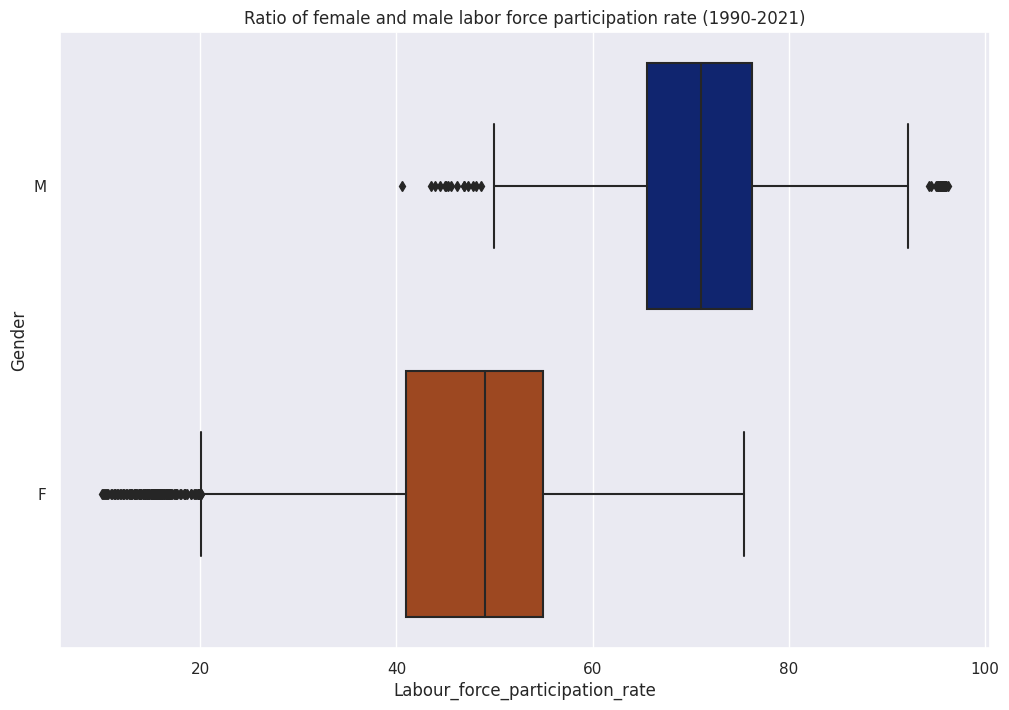

In [37]:
#We can see there is a significant difference between male and female participation
plt.figure(figsize=(12,8))
plt.title('Ratio of female and male labor force participation rate (1990-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
sns.set_theme(style="darkgrid")
sns.boxplot(data=df_labor_force, x='Labour_force_participation_rate', y='Gender' ,orient='h',palette='dark', order=['M','F'])
plt.show()

### 2. Female Employment 
- The female employment-to-population ratio is a measure that expresses the proportion of women who are employed relative to the total female population of working age. 
- It is typically calculated by dividing the number of employed women by the total number of women in the working-age population (usually defined as those aged 15 to 64), and then multiplying the result by 100 to express it as a percentage.
- A higher ratio generally indicates a greater degree of economic participation among women

In [38]:
df_female_employmennt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    2652 non-null   object 
 1   Code                                      2652 non-null   object 
 2   Year                                      2652 non-null   int64  
 3   ratio_of_female_employment_to_population  2652 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.0+ KB


In [39]:
df_female_employmennt.head()

,Entity,Code,Year,ratio_of_female_employment_to_population
0,Albania,ALB,2002,43.67
1,Albania,ALB,2004,39.00
2,Albania,ALB,2005,39.61
3,Albania,ALB,2007,30.69
4,Albania,ALB,2008,39.39


In [40]:
# Checking null values
# No null values
is_null(df_female_employmennt)

Entity                                      0
Code                                        0
Year                                        0
ratio_of_female_employment_to_population    0
dtype: int64

In [41]:
# Checking outliers
# No outliers
get_outliers(df_female_employmennt,'ratio_of_female_employment_to_population')

Series([], Name: ratio_of_female_employment_to_population, dtype: float64)

In [42]:
# Year between 1980-2021
# Most of the countries more than half of the women population is not employed 
df_female_employmennt.describe()

,Year,ratio_of_female_employment_to_population
count,2652.000000,2652.000000
mean,2004.611991,44.633925
std,10.914705,12.713533
min,1980.000000,3.800000
25%,1997.000000,37.657500
50%,2006.000000,46.265000
75%,2014.000000,52.422500
max,2021.000000,85.000000


<Axes: title={'center': 'Ratio of Female Employment to Population (1980-2021)'}, xlabel='ratio_of_female_employment_to_population'>

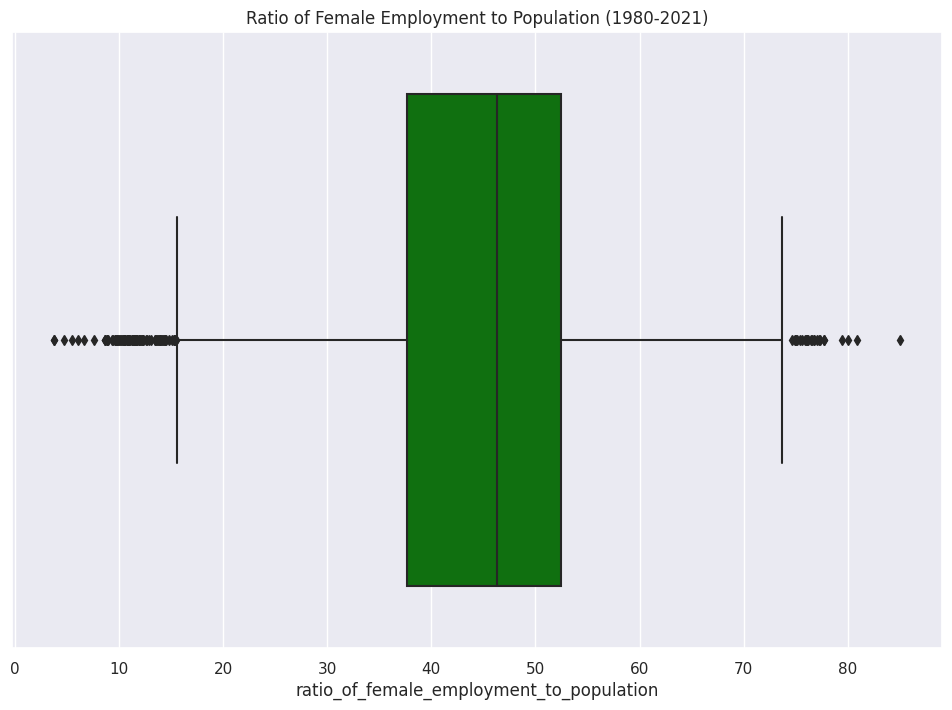

In [43]:
# Most of the data has 40-55 ratio
# the proportion of women who are employed relative to the total female population of working age
# Half of the women in working age is not employed in the countries HDI rank is high or very high
plt.figure(figsize=(12,8))
plt.title('Ratio of Female Employment to Population (1980-2021)')
plt.xlabel('Ratio of Female Employment to Population (%)')
sns.set_theme(style="darkgrid")
sns.boxplot(data=df_female_employmennt, x='ratio_of_female_employment_to_population',orient='h',color='green')

### 3. Share of Male Female Employment
- The proportion of total employment within a specific sector, occupation, or workforce that is accounted for by either males or females. 
- It represents the percentage of individuals of a particular gender relative to the total number of individuals employed in a given context.
- This metric provides insights into patterns of gender representation and participation in the labor market, as well as potential disparities or inequalities in employment opportunities and outcomes between genders.

In [44]:
df_share_of_male_female_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             4746 non-null   object 
 1   Code                               4746 non-null   object 
 2   Year                               4746 non-null   int64  
 3   employement_percentage_male        3016 non-null   float64
 4   employement_percentage_female      3016 non-null   float64
 5   Population (historical estimates)  4746 non-null   float64
 6   Continent                          113 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 259.7+ KB


In [45]:
# Dropping Continent column because it mostly null and we don't use it
df_share_of_male_female_employment = df_share_of_male_female_employment.reset_index(drop=True).drop(columns=['Continent'])

In [46]:
df_share_of_male_female_employment.head()

,Entity,Code,Year,employement_percentage_male,employement_percentage_female,Population (historical estimates)
0,Albania,ALB,1991,15.26,6.77,3302087.0
1,Albania,ALB,1992,15.05,6.85,3303738.0
2,Albania,ALB,1993,15.35,6.91,3300715.0
3,Albania,ALB,1994,15.61,6.99,3294001.0
4,Albania,ALB,1995,15.97,7.10,3284370.0


In [47]:
is_null(df_share_of_male_female_employment)

employement_percentage_male          1730
employement_percentage_female        1730
Entity                                  0
Code                                    0
Year                                    0
Population (historical estimates)       0
dtype: int64

In [48]:
# Filling null values in the employment_percentage
# If the country has other data in years we fill with the average of the country
# If country has no data we get the that year average percentage
def fill_employment_percentage():
    null_index=df_share_of_male_female_employment[df_share_of_male_female_employment['employement_percentage_male'].isnull()][['Entity','Year']].index
    for index in null_index:
        # Getting the null data
        Country=df_share_of_male_female_employment.loc[index,'Entity']
        Year=df_share_of_male_female_employment.loc[index,'Year']

       # Getting that countries average
        new_value_male =df_share_of_male_female_employment[['Entity','employement_percentage_male','employement_percentage_female']].query('Entity == @Country')\
            .groupby(['Entity']).mean()['employement_percentage_male'].iloc[0]
        new_value_female =df_share_of_male_female_employment[['Entity','employement_percentage_male','employement_percentage_female']].query('Entity == @Country')\
            .groupby(['Entity']).mean()['employement_percentage_female'].iloc[0]
        # Adding or substracting from year to be more realistic year affects the percentage
        if (Year<1990):
            new_value_male-=3
            new_value_female-=3
        elif(Year>2000):
            new_value_male+=3
            new_value_female+=3
        # If null getting that year's average
        if math.isnan(new_value_male):
            new_value_male =df_share_of_male_female_employment[['Year','employement_percentage_male','employement_percentage_female']].query('Year ==@Year').\
            groupby('Year').mean()['employement_percentage_male'].iloc[0]
            new_value_female = df_share_of_male_female_employment[['Year','employement_percentage_male','employement_percentage_female']].query('Year ==@Year').\
            groupby('Year').mean()['employement_percentage_female'].iloc[0]
        
        #Filling the null values
        df_share_of_male_female_employment.loc[index,'employement_percentage_male']=round(new_value_male,2)
        df_share_of_male_female_employment.loc[index,'employement_percentage_female']=round(new_value_female,2)



In [49]:
fill_employment_percentage()

In [50]:
is_null(df_share_of_male_female_employment)

Entity                               0
Code                                 0
Year                                 0
employement_percentage_male          0
employement_percentage_female        0
Population (historical estimates)    0
dtype: int64

In [51]:
get_outliers(df_share_of_male_female_employment,'employement_percentage_male')

Series([], Name: employement_percentage_male, dtype: float64)

In [52]:
get_outliers(df_share_of_male_female_employment,'employement_percentage_female')

Series([], Name: employement_percentage_female, dtype: float64)

In [53]:
# Male employment percentage is mostly between 23-34
# Female employment percentage is mostly between 8-17
df_share_of_male_female_employment.describe()

,Year,employement_percentage_male,employement_percentage_female,Population (historical estimates)
count,4746.000000,4746.000000,4746.000000,4.746000e+03
mean,2000.500000,28.922377,14.255769,3.308125e+07
std,12.122196,7.957281,8.630559,1.233211e+08
min,1980.000000,7.490000,-2.120000,1.227900e+04
25%,1990.000000,23.370000,8.662500,1.353362e+06
50%,2000.500000,28.995000,12.360000,5.212998e+06
75%,2011.000000,34.167500,17.897500,2.170153e+07
max,2021.000000,67.400000,61.350000,1.425894e+09


<Axes: title={'center': 'Share of male female employment (1980-2016)'}, xlabel='Employment Percentage (%)'>

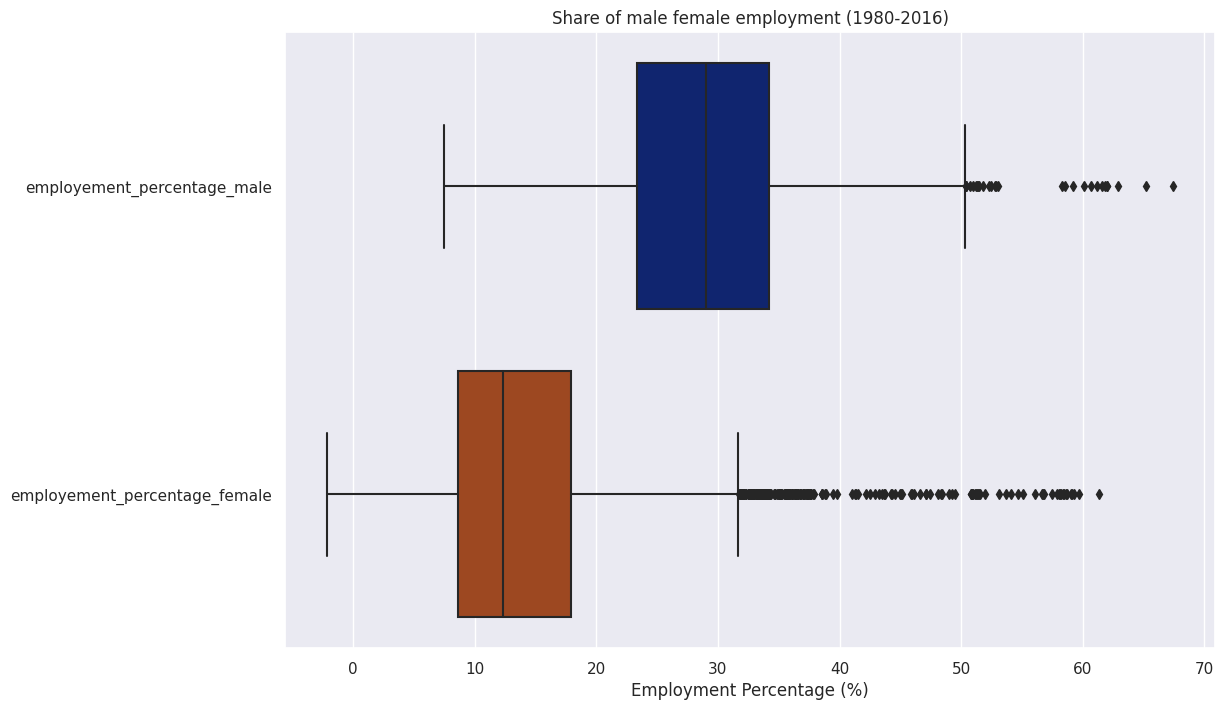

In [54]:
#Male employment percentage higher than female
plt.figure(figsize=(12,8))
plt.title('Share of male female employment (1980-2016)')
plt.xlabel('Employment Percentage (%)')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_share_of_male_female_employment[['employement_percentage_male','employement_percentage_female']],orient='h',palette='dark')

### Why Women Participate in the Labor Force Less Than Men Datasets

### 1. Gender Gap Wage 
- The gender wage gap is defined as the difference between median earnings of men and women relative to median earnings of men.
- If it is positive it means women earn less money than men for comparable work


In [55]:
df_gender_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               326 non-null    object 
 1   Code                 326 non-null    object 
 2   Year                 326 non-null    int64  
 3   Gender_wage_gap_(%)  326 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.3+ KB


In [56]:
df_gender_wage.head()

,Entity,Code,Year,Gender_wage_gap_(%)
0,Argentina,ARG,1986,15.79
1,Argentina,ARG,1987,12.50
2,Argentina,ARG,1988,11.31
3,Argentina,ARG,1991,6.71
4,Argentina,ARG,1992,8.33


In [57]:
# Checking null values
is_null(df_gender_wage)

Entity                 0
Code                   0
Year                   0
Gender_wage_gap_(%)    0
dtype: int64

In [58]:
# Checking outliers
# No outliers
get_outliers(df_gender_wage,'Gender_wage_gap_(%)')

Series([], Name: Gender_wage_gap_(%), dtype: float64)

In [59]:
# Year:1981-2016
# Mostly women paid 5%-17% less money than men
# Maximum wage gap is 35% with disadventeging women
# There is also at least on data that men less paid than women with -21%
df_gender_wage.describe()

,Year,Gender_wage_gap_(%)
count,326.000000,326.000000
mean,2005.466258,11.964080
std,7.969003,9.605632
min,1981.000000,-21.570000
25%,2001.000000,5.290000
50%,2007.000000,11.750000
75%,2012.000000,17.687500
max,2016.000000,35.750000


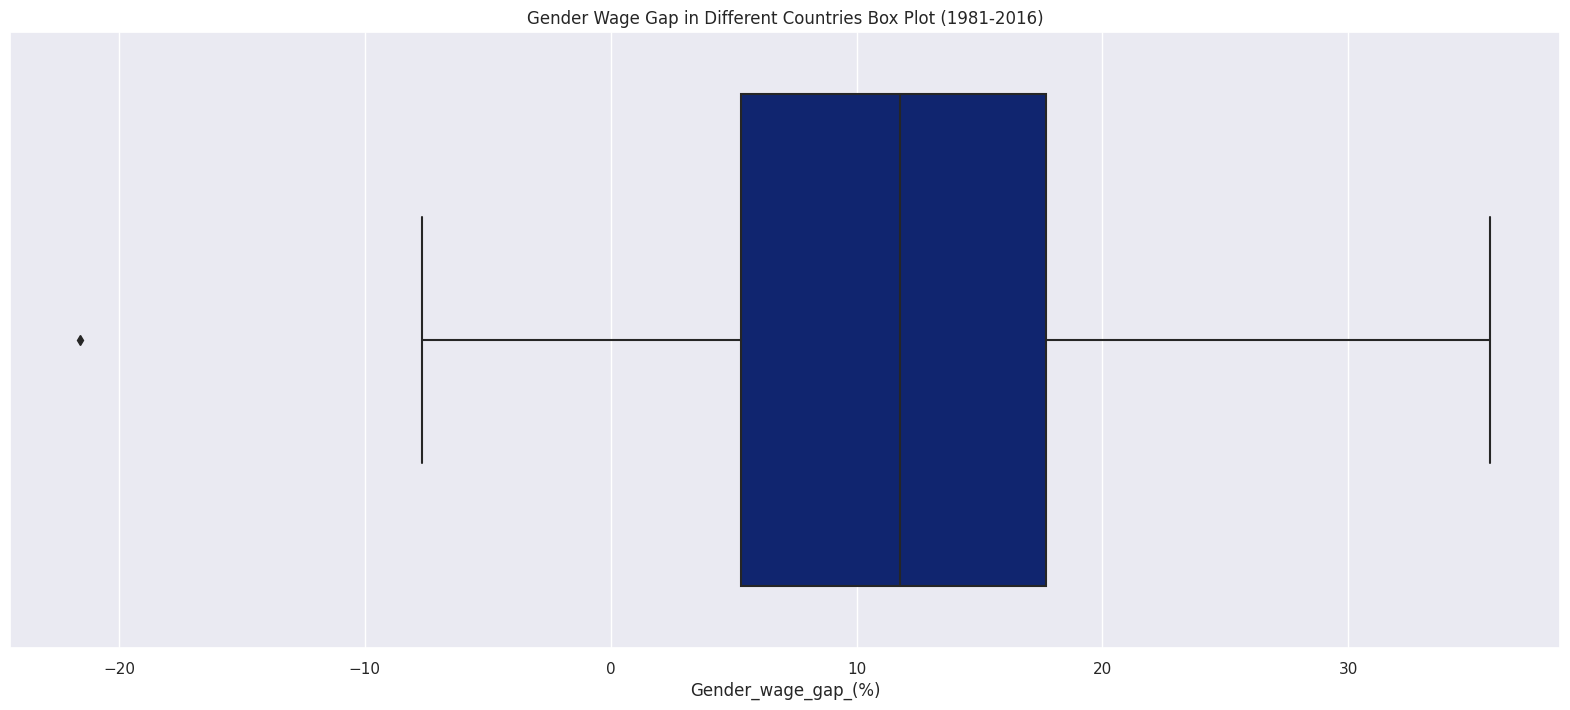

In [60]:
# Most of the data has 5-15 percent gap
# Mostly there is gender wage gap disadventeging women

plt.figure(figsize=(20,8))
plt.title('Gender Wage Gap in Different Countries Box Plot (1981-2016)')
plt.xlabel('Gender Wage Gap (%)')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_gender_wage, x='Gender_wage_gap_(%)',orient='h',palette='dark')
plt.show()

### 2. Share of Income
- Percentage of individuals falling into top income brackets that are women

In [61]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    148 non-null    object 
 1   Code                      148 non-null    object 
 2   Year                      148 non-null    int64  
 3   share_of_women_top_0.1%   111 non-null    float64
 4   share_of_women_top_0.25%  17 non-null     float64
 5   share_of_women_top_0.5%   62 non-null     float64
 6   share_of_women_top_1%     147 non-null    float64
 7   share_of_women_top_10%    148 non-null    float64
 8   share_of_women_top_5%     148 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 10.5+ KB


In [62]:
df_income.head()

,Entity,Code,Year,share_of_women_top_0.1%,share_of_women_top_0.25%,share_of_women_top_0.5%,share_of_women_top_1%,share_of_women_top_10%,share_of_women_top_5%
0,Australia,AUS,2000,14.2,NaN,NaN,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,NaN,NaN,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,NaN,NaN,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,NaN,NaN,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,NaN,NaN,19.6,25.5,22.2


In [63]:
is_null(df_income)

share_of_women_top_0.25%    131
share_of_women_top_0.5%      86
share_of_women_top_0.1%      37
share_of_women_top_1%         1
Entity                        0
Code                          0
Year                          0
share_of_women_top_10%        0
share_of_women_top_5%         0
dtype: int64

In [64]:
# Training the regression model for filling the null values
def predict_income(y_col):
    try:
        # finding the which columns are not null when wanted column is null
        # If the wanted column nan and one of the columns nan it will not take that column as a feature
        # Because we cant give model nan values. When we are predicting we need that features values
        x_cols = df_income[share_cols].columns[~df_income[share_cols][(df_income[y_col].isna())].isnull().any()].to_list()
        # Getting the training dataset
        # After finding x_cols find the data which x_cols and y_col is not nan 
        df_income_train = df_income[df_income[x_cols + [y_col]].notna().all(axis=1)][x_cols + [y_col]]
        # Splitting the data
        X_train, X_test, y_train, y_test=train_test_split(df_income_train[x_cols],df_income_train[y_col], test_size=0.2)
        # Initilazing regression model
        regr = linear_model.LinearRegression()
        # Transforming data to numpy arrays
        X_train = np.asanyarray(X_train[x_cols])
        y_train = np.asanyarray(y_train)
        X_test = np.asanyarray(X_test[x_cols])
        y_test = np.asanyarray(y_test)
        # Training the model
        regr.fit(X_train,y_train)
        # Predicting test data
        pred = regr.predict(X_test)
        # Evaulating models
        print(f'MAE = {np.mean(abs(y_test - pred))}')
        print(f'MSE = {np.mean(np.square(y_test - pred))}')
        print(f'RMSE = {np.sqrt(np.mean((y_test - pred) ** 2))}')
        print("Training score: ", r2_score(y_test, pred))
    except:
            return 'No null value found'
    return regr

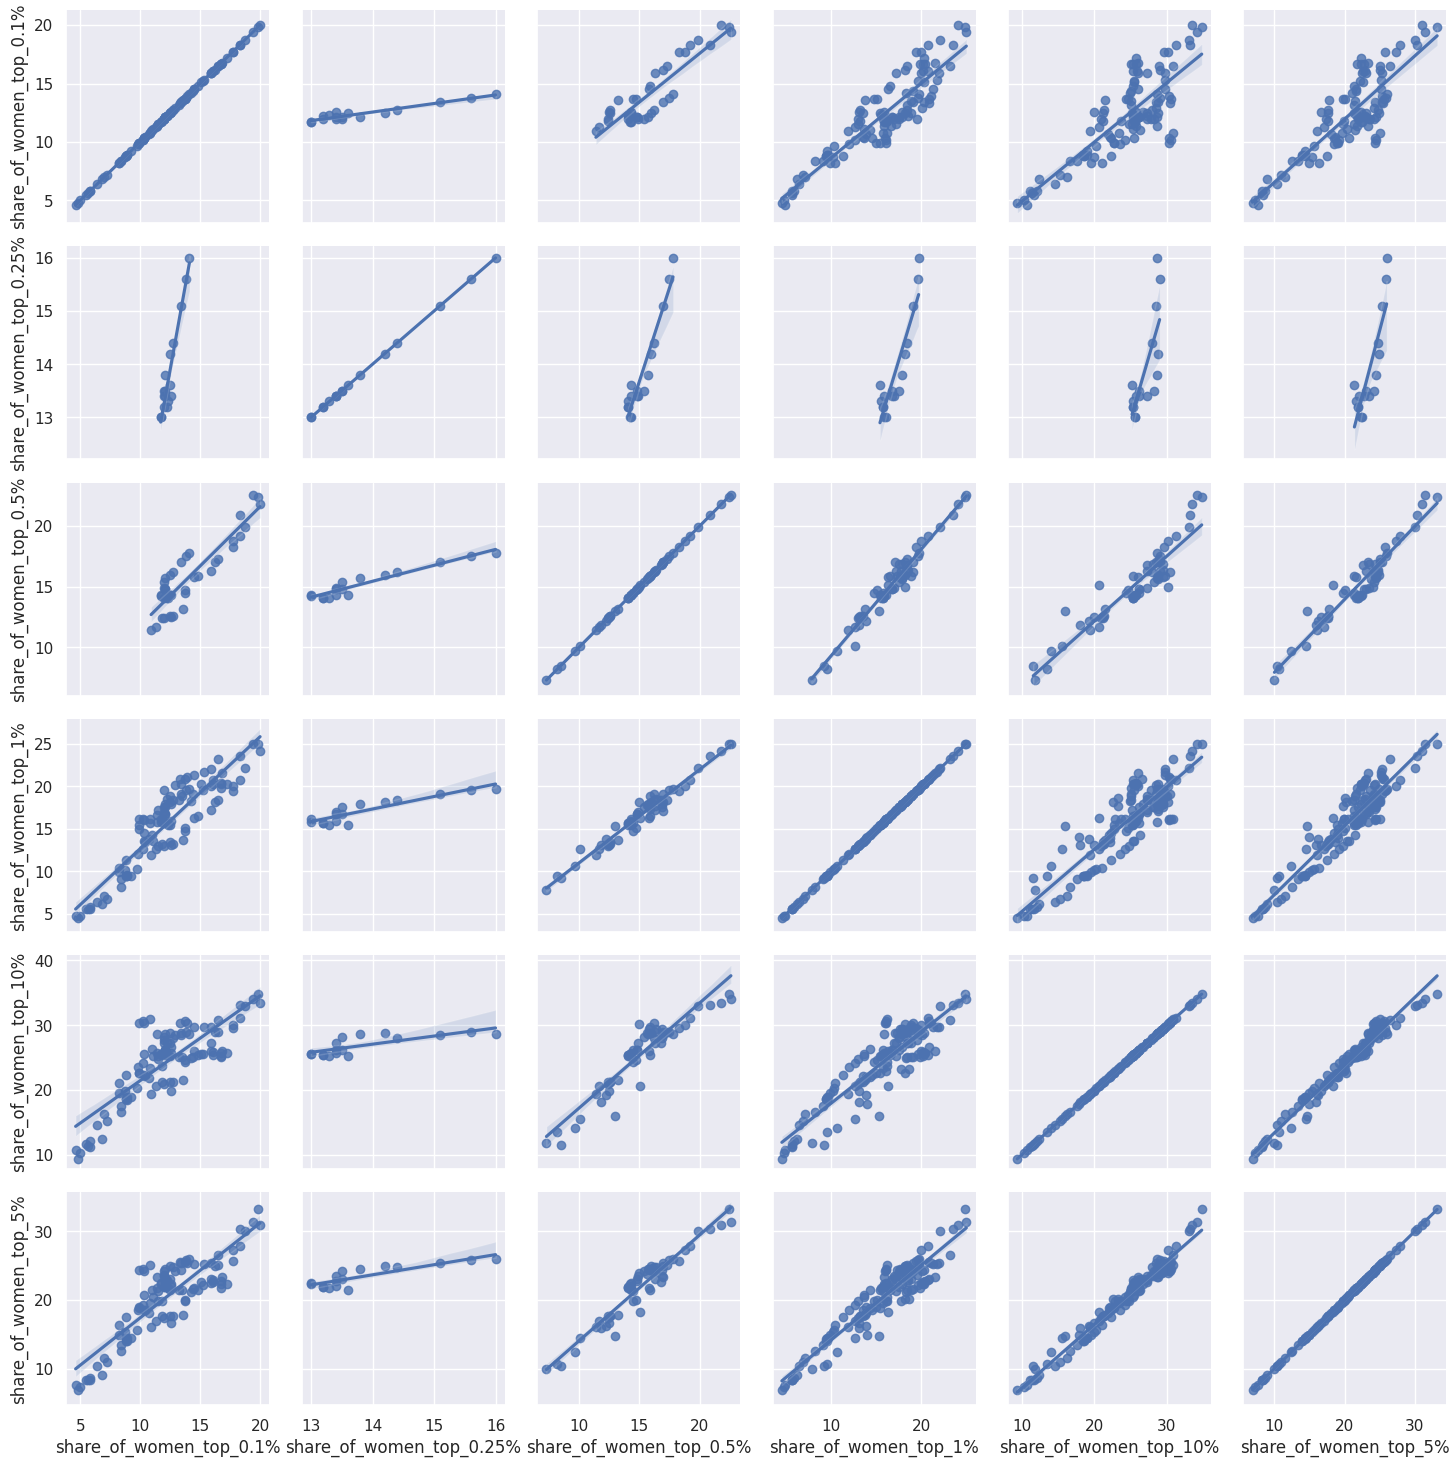

In [65]:
# We can use these data to train regression model and predict values
g = sns.PairGrid(df_income[['share_of_women_top_0.1%',
       'share_of_women_top_0.25%', 'share_of_women_top_0.5%',
       'share_of_women_top_1%', 'share_of_women_top_10%',
       'share_of_women_top_5%']])
g.map(sns.regplot)
plt.show()

# Getting the share of columns
share_cols = [col for col in df_income.columns if df_income[col].dtypes != "O" and col not in "Year"]

In [66]:
# Getting the null values and filling them with regression model
def fill_income(y_col,regr):
    try : 
        # Getting the same x_cols
        x_cols = df_income[share_cols].columns[~df_income[share_cols][(df_income[y_col].isna())].isnull().any()].to_list()
        # Getting the null data indexes
        null_index = df_income[((df_income[x_cols].notna().all(axis=1)) \
        & (df_income[y_col].isna()))].index
        # Predicting the null share_of value
        for index in null_index:
            x=np.asanyarray(df_income.loc[index,x_cols])
            y=regr.predict(x.reshape(-1,len(x)))
            df_income.loc[index,y_col]= round(y[0])
    except:
        return 'No null value found'

In [67]:
# Filling null values starting at the least amount of null values
for col in ['share_of_women_top_1%','share_of_women_top_0.1%',
             'share_of_women_top_0.5%','share_of_women_top_0.25%',]:
    if df_income[col].isnull().any():
        print(col)
        regr = predict_income(col)
        fill_income(col,regr)

share_of_women_top_1%
MAE = 1.1351487691848623
MSE = 1.7606402208307457
RMSE = 1.3268911865072983
Training score:  0.9373644695249941
share_of_women_top_0.1%
MAE = 1.0546114999310519
MSE = 1.5498905283417799
RMSE = 1.2449459941466456
Training score:  0.9009902173317939
share_of_women_top_0.5%
MAE = 0.29664675975408333
MSE = 0.23140778502413906
RMSE = 0.4810486306228707
Training score:  0.9834869249381077
share_of_women_top_0.25%
MAE = 0.12501179809927354
MSE = 0.019912010258706724
RMSE = 0.14110992260896016
Training score:  0.9845343609641113


In [68]:
is_null(df_income)

Entity                      0
Code                        0
Year                        0
share_of_women_top_0.1%     0
share_of_women_top_0.25%    0
share_of_women_top_0.5%     0
share_of_women_top_1%       0
share_of_women_top_10%      0
share_of_women_top_5%       0
dtype: int64

In [69]:
# Year is between 1980-2015
# For share of women in top percent 0.1, 0.25, 0.5 mostly 10-15% are women
# For share of women in top percent 1, 5, 10  mostly 13-25% are women
# We can see number of women in top income is very low 
df_income.describe()

,Year,share_of_women_top_0.1%,share_of_women_top_0.25%,share_of_women_top_0.5%,share_of_women_top_1%,share_of_women_top_10%,share_of_women_top_5%
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2001.844595,12.329054,13.200000,14.255405,15.733784,24.312162,20.437162
std,9.227077,3.072087,3.546388,3.849945,4.568132,5.603011,5.288613
min,1980.000000,4.600000,4.000000,4.000000,4.500000,9.400000,6.900000
25%,1996.000000,10.775000,12.000000,12.350000,13.200000,21.200000,17.675000
50%,2004.000000,12.400000,13.550000,15.000000,16.300000,25.400000,21.750000
75%,2009.000000,14.000000,15.000000,17.000000,18.800000,28.800000,24.225000
max,2015.000000,20.000000,22.000000,22.600000,25.000000,34.800000,33.200000


<Axes: title={'center': 'Share of Women in Top Box Plot (1980-2015)'}, xlabel='Share of Women (%)'>

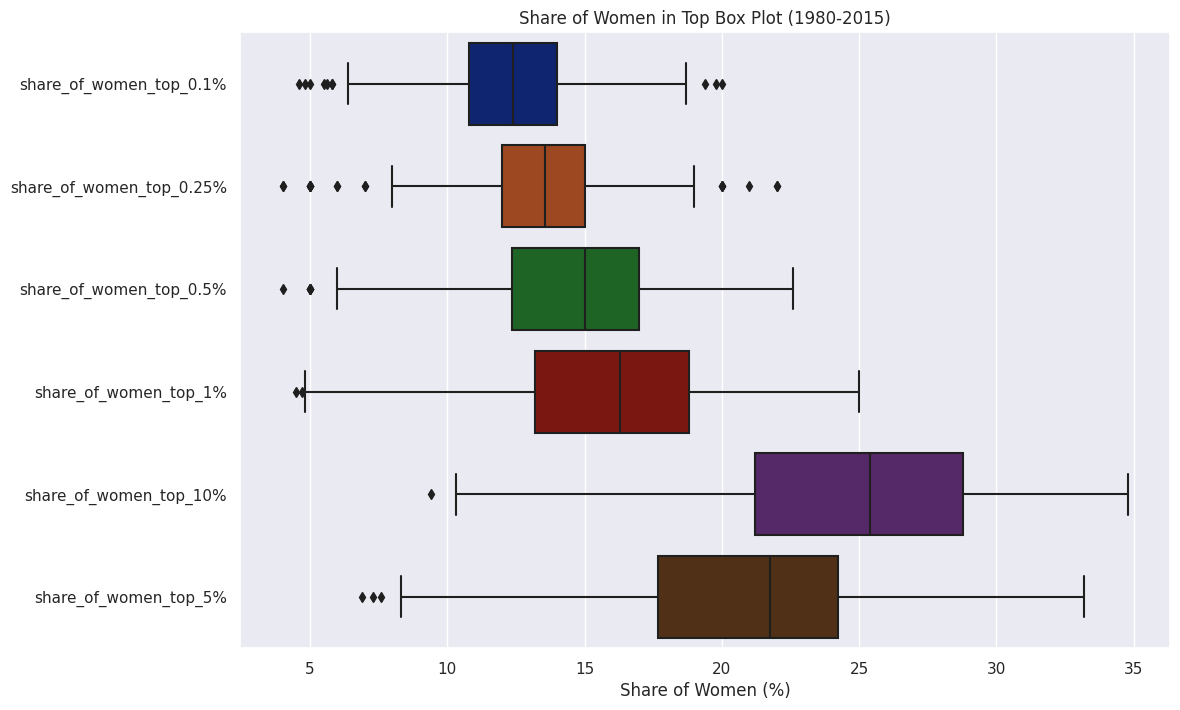

In [70]:
# Mostly women not in top incomes
plt.figure(figsize=(12,8))
plt.title('Share of Women in Top Box Plot (1980-2015)')
plt.xlabel('Share of Women (%)')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_income[share_cols],orient='h',palette='dark')

### 3. Unpaid care work dataset
- Unpaid care work refers to all unpaid services provided within a household for its members, including care of persons, housework and voluntary community work.
- The ratio is calculated by dividing the average time spent by females by the average time spent by males.
- This ratio provides insights into gender disparities in unpaid care work responsibilities. A ratio greater than 1 indicates that females, on average, spend more time on unpaid care work compared to males


In [71]:
df_unpaid_care_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Entity                         52 non-null     object 
 1   Code                           52 non-null     object 
 2   Year                           52 non-null     int64  
 3   f_to_m_unpaid_care_work_ratio  52 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB


In [72]:
df_unpaid_care_work.head()

,Entity,Code,Year,f_to_m_unpaid_care_work_ratio
0,Albania,ALB,2014,7.21
1,Algeria,DZA,2014,6.75
2,Argentina,ARG,2014,2.88
3,Armenia,ARM,2014,5.24
4,Australia,AUS,2014,1.81


In [73]:
# Checking null values
# There is one null value
# It is not important 
is_null(df_unpaid_care_work)

Entity                           0
Code                             0
Year                             0
f_to_m_unpaid_care_work_ratio    0
dtype: int64

In [74]:
get_outliers(df_unpaid_care_work,'f_to_m_unpaid_care_work_ratio')

Series([], Name: f_to_m_unpaid_care_work_ratio, dtype: float64)

In [75]:
# Data only contains information about 2014
# We can see from the ratio women takes more responsibilty for unpaid care work
# We can say mostly woman around the world do 2-3 times more unpaid care work than men
df_unpaid_care_work.describe()

,Year,f_to_m_unpaid_care_work_ratio
count,52.0,52.000000
mean,2014.0,2.757885
std,0.0,1.487806
min,2014.0,1.300000
25%,2014.0,1.770000
50%,2014.0,2.165000
75%,2014.0,3.230000
max,2014.0,7.490000


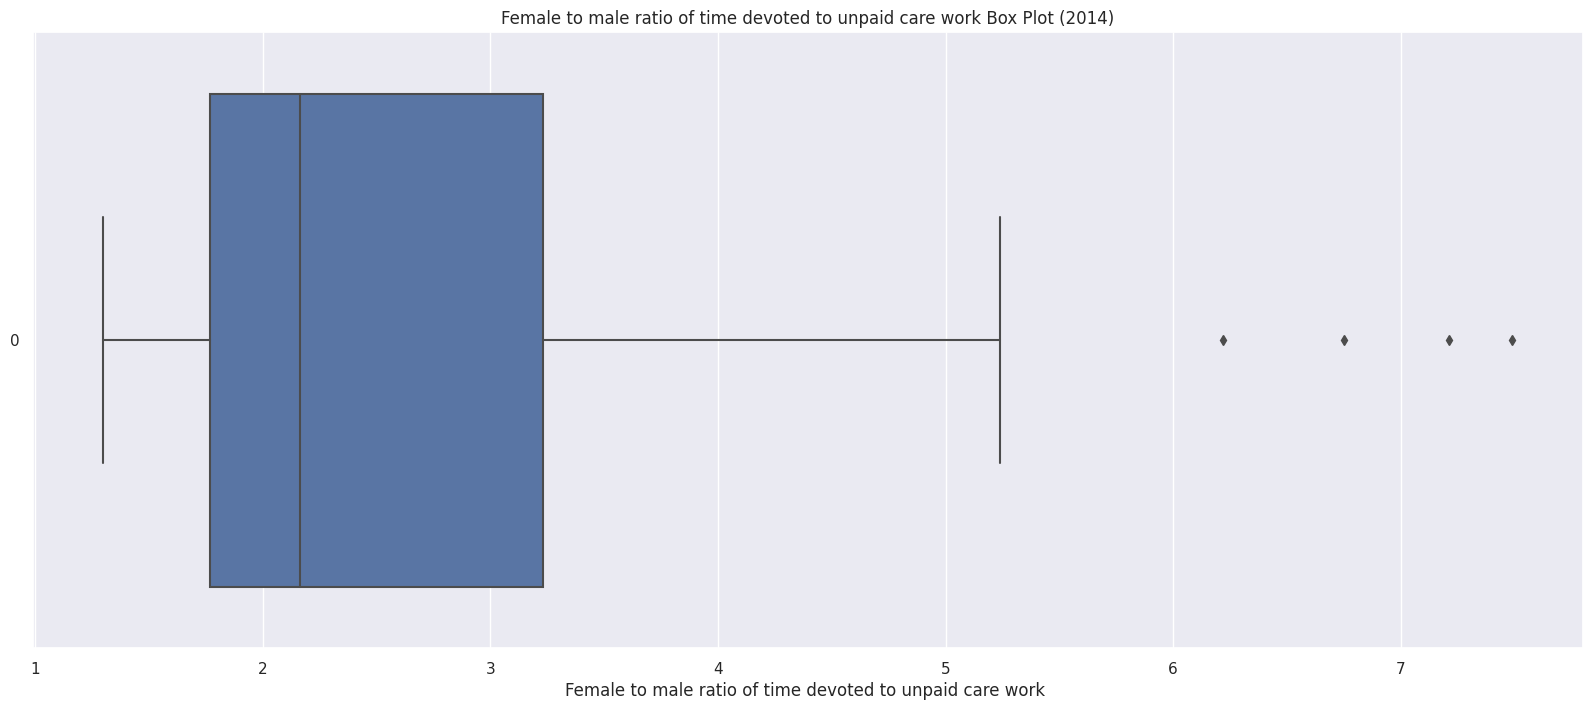

In [76]:
# Mostly ratio is bigger than 1 and lower than 5
# Woman do 2-3 times more unpaid care work 
plt.figure(figsize=(20,8))
plt.title('Female to male ratio of time devoted to unpaid care work Box Plot (2014)')
plt.xlabel('Female to male ratio of time devoted to unpaid care work ')
sns.set_theme(style="darkgrid")
sns.boxplot(df_unpaid_care_work['f_to_m_unpaid_care_work_ratio'],orient='h')
plt.show()

### 4. Fertility - Labor Force
- The fertility rate, expressed as the number of children per woman, is based on age-specific fertility rates in a given year.

In [77]:
df_fertility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Entity                          4746 non-null   object 
 1   Code                            4746 non-null   object 
 2   Year                            4746 non-null   int64  
 3   Labor_force_participation_rate  2937 non-null   float64
 4   Fertility_rate                  4746 non-null   float64
 5   Population                      4746 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 222.6+ KB


In [78]:
df_fertility.head()

,Entity,Code,Year,Labor_force_participation_rate,Fertility_rate,Population
0,Albania,ALB,1989,46.76,2.9416,3282187.0
1,Albania,ALB,1990,45.22,2.9003,3295073.0
2,Albania,ALB,1991,44.52,2.8259,3302087.0
3,Albania,ALB,1992,44.18,2.7670,3303738.0
4,Albania,ALB,1993,36.54,2.7071,3300715.0


In [79]:
# Checking null values
# No null values in the important columns
is_null(df_fertility)


Labor_force_participation_rate    1809
Entity                               0
Code                                 0
Year                                 0
Fertility_rate                       0
Population                           0
dtype: int64

In [80]:
# Filling Labor_force_participation_rate in fertilty data
# Getting the data from Labor_force_participation_rate dataset
def fill_fertility():
 
    null_index=df_fertility[df_fertility['Labor_force_participation_rate'].isnull()].index
    for index in null_index:
        # Getting the null data
        Entity =df_fertility.loc[index,'Entity']
        Year=df_fertility.loc[index,'Year']
        # Fertility data year starts at 1980 and labor force starts 1990
        if (Year<1990):
            Year=1990
        # Getting the labor force participation from continent, gender, year 
        new_value =df_labor_force.query('Gender == "F" & Country == @Entity & \
                            Year == @Year ')['Labour_force_participation_rate']
        # If the value not exist on labor force dataset calculate that country's average of labor participation rate in existing years 
        if len(new_value) == 0:
            new_value = df_fertility[['Entity','Labor_force_participation_rate']].query('Entity == @Entity').\
            groupby('Entity').mean()['Labor_force_participation_rate'].iloc[0]
        else:
            new_value = new_value.values[0]
        df_fertility.loc[index,'Labor_force_participation_rate']=round(new_value,2)

        

In [81]:
fill_fertility()

In [82]:
is_null(df_fertility)

Entity                            0
Code                              0
Year                              0
Labor_force_participation_rate    0
Fertility_rate                    0
Population                        0
dtype: int64

In [83]:
# Checking outliers
# No outliers
get_outliers(df_fertility,'Fertility_rate')

Series([], Name: Fertility_rate, dtype: float64)

In [84]:
# Checking outliers
# No outliers
get_outliers(df_fertility,'Labor_force_participation_rate')

Series([], Name: Labor_force_participation_rate, dtype: float64)

In [85]:
df_fertility.describe()

,Year,Labor_force_participation_rate,Fertility_rate,Population
count,4746.000000,4746.000000,4746.000000,4.746000e+03
mean,2000.500000,46.635211,2.362879,3.308125e+07
std,12.122196,13.593753,1.118572,1.233211e+08
min,1980.000000,2.440000,0.745500,1.227900e+04
25%,1990.000000,38.742500,1.587600,1.353362e+06
50%,2000.500000,48.450000,2.000600,5.212998e+06
75%,2011.000000,55.467500,2.789450,2.170153e+07
max,2021.000000,87.590000,8.124600,1.425894e+09


<Axes: title={'center': 'Fertility Rate in Different Countries Box Plot (1980-2021)'}, xlabel='Fertility Rate'>

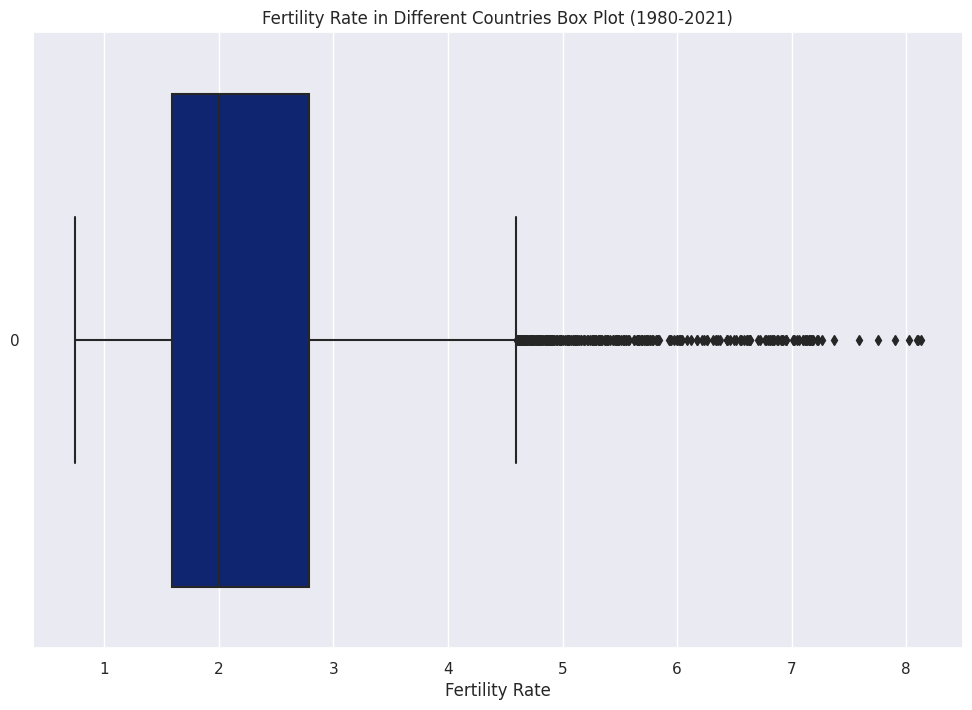

In [86]:
plt.figure(figsize=(12,8))
plt.title('Fertility Rate in Different Countries Box Plot (1980-2021)')
plt.xlabel('Fertility Rate')
sns.set_theme(style="darkgrid")
sns.boxplot( data=df_fertility['Fertility_rate'],orient='h',palette='dark')

### 5. A Woman Can Get a Job In The Same Way As a Men
- Restrictions on a woman's legal capacity and ability to work considered.
- It provides a measure of whether there are certain jobs that women are not allowed to do. 

In [87]:
df_woman_can_get_same_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Entity                                 4687 non-null   object
 1   Code                                   4687 non-null   object
 2   Year                                   4687 non-null   int64 
 3   a_woman_can_get_a_job_in_the_same_way  4687 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 146.6+ KB


In [88]:
df_woman_can_get_same_jobs.sample(5)

,Entity,Code,Year,a_woman_can_get_a_job_in_the_same_way
1953,Israel,ISR,1998,1
1332,Fiji,FJI,2022,1
2767,Montenegro,MNE,1995,1
2610,Mauritius,MUS,2010,1
1968,Israel,ISR,2013,1


In [89]:
# 1= Yes ,0= No
# Data is mostly leaning into Yes but there are still no
# Year is between 1980-2022
df_woman_can_get_same_jobs.describe()

,Year,a_woman_can_get_a_job_in_the_same_way
count,4687.000000,4687.000000
mean,2001.000000,0.897376
std,12.410998,0.303500
min,1980.000000,0.000000
25%,1990.000000,1.000000
50%,2001.000000,1.000000
75%,2012.000000,1.000000
max,2022.000000,1.000000


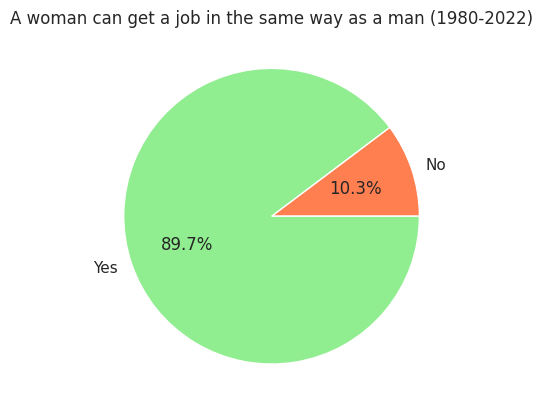

<Figure size 1200x800 with 0 Axes>

In [90]:
# there is still a belief that some jobs are not suitable for women. 
plt.pie(
        x=[
        len(df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 0')),
        len(df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 1')),
        ],
        labels=['No', 'Yes'],
        autopct='%1.1f%%',
        colors=['coral', 'lightgreen',],
)
plt.title('A woman can get a job in the same way as a man (1980-2022)')
plt.figure(figsize=(12, 8))
plt.show()

## Deep Data 
- Now we are going to visualize data to gain more information


### Labor Force Participation 

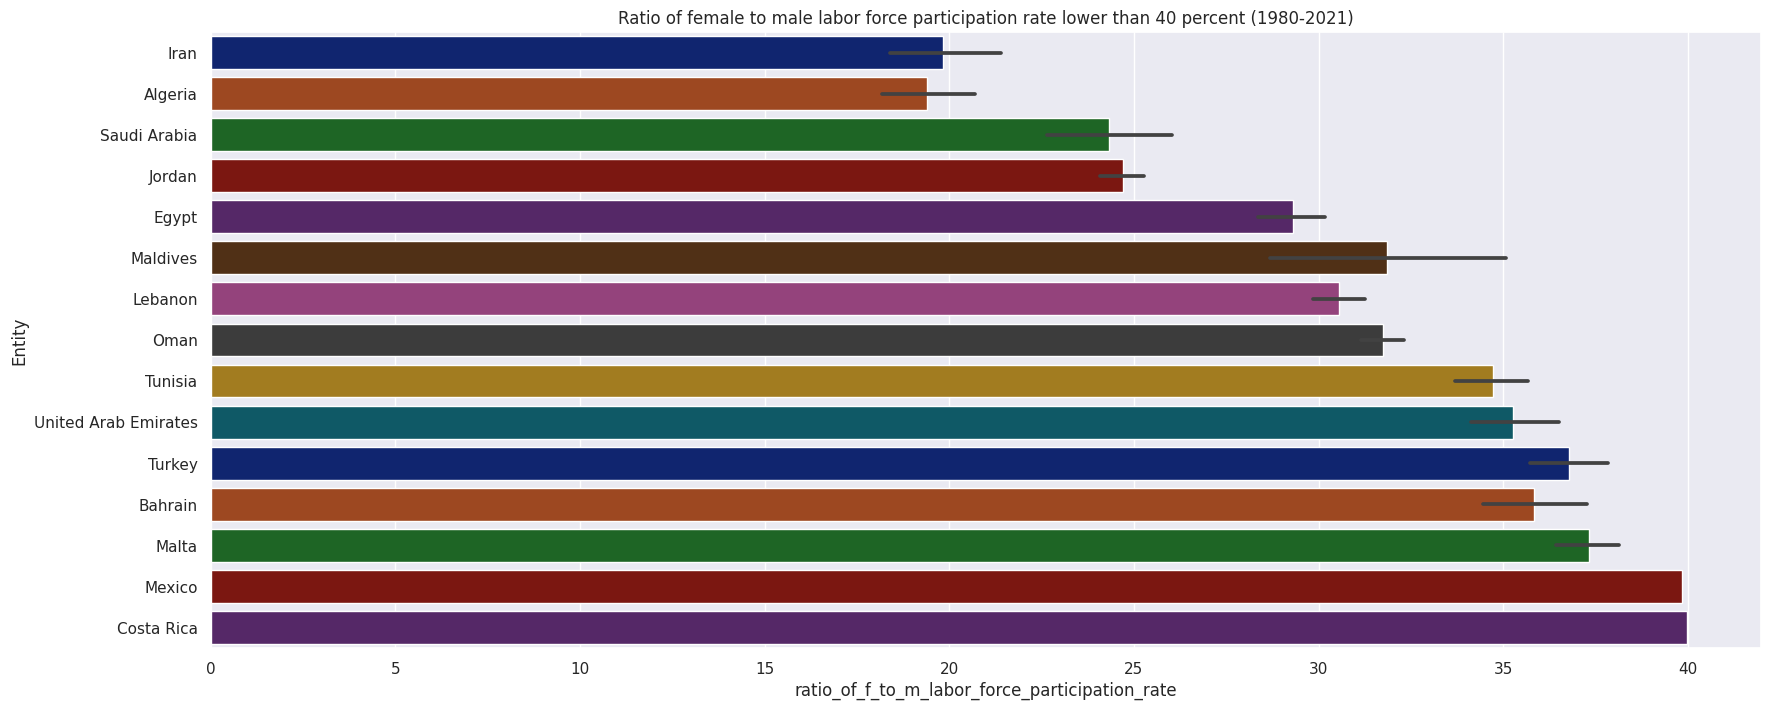

In [91]:
# The countries labor force participation female to male ratio is the least
# Turkey is one of them
# Iran, Algeria and Saudi Arabia has the least amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate lower than 40 percent (1980-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
plt.ylabel('Countries')
sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate < 40 ').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=True), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'
            ,orient='h'
            
)
plt.show()

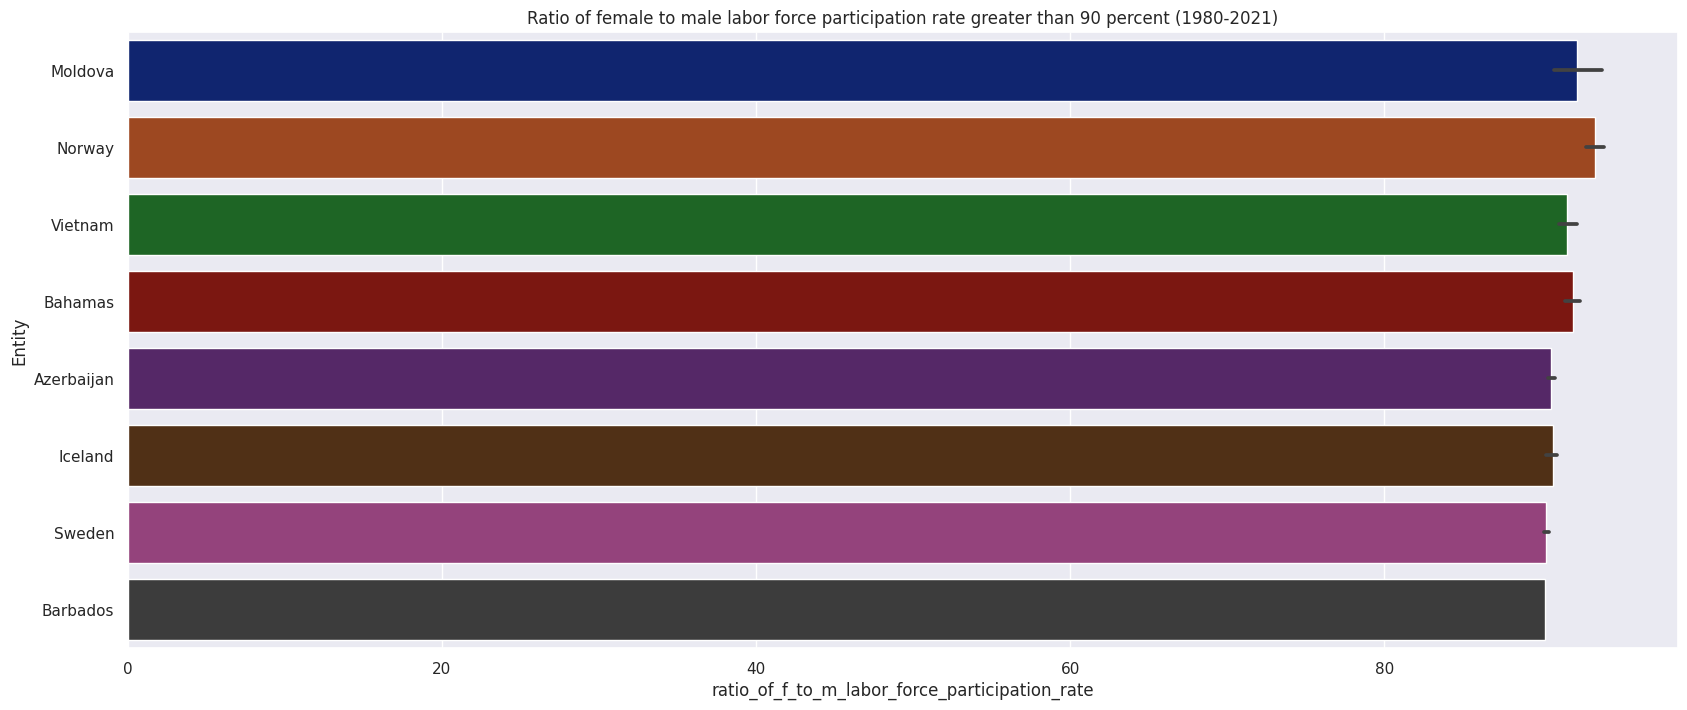

In [92]:
# The countries labor force participation female to male ratio is the most
# Moldova, Norway and Vietnam has the most amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate greater than 90 percent (1980-2021)')
plt.xlabel('Ratio of female to male labor force participation rate (%)')
plt.ylabel('Countries')
sns.barplot(data=df_ratio_labor.query('ratio_of_f_to_m_labor_force_participation_rate > 90').sort_values(by = ['ratio_of_f_to_m_labor_force_participation_rate'],ascending=False), y="Entity", x="ratio_of_f_to_m_labor_force_participation_rate",palette='dark'
            ,orient='h'
            
)
plt.show()

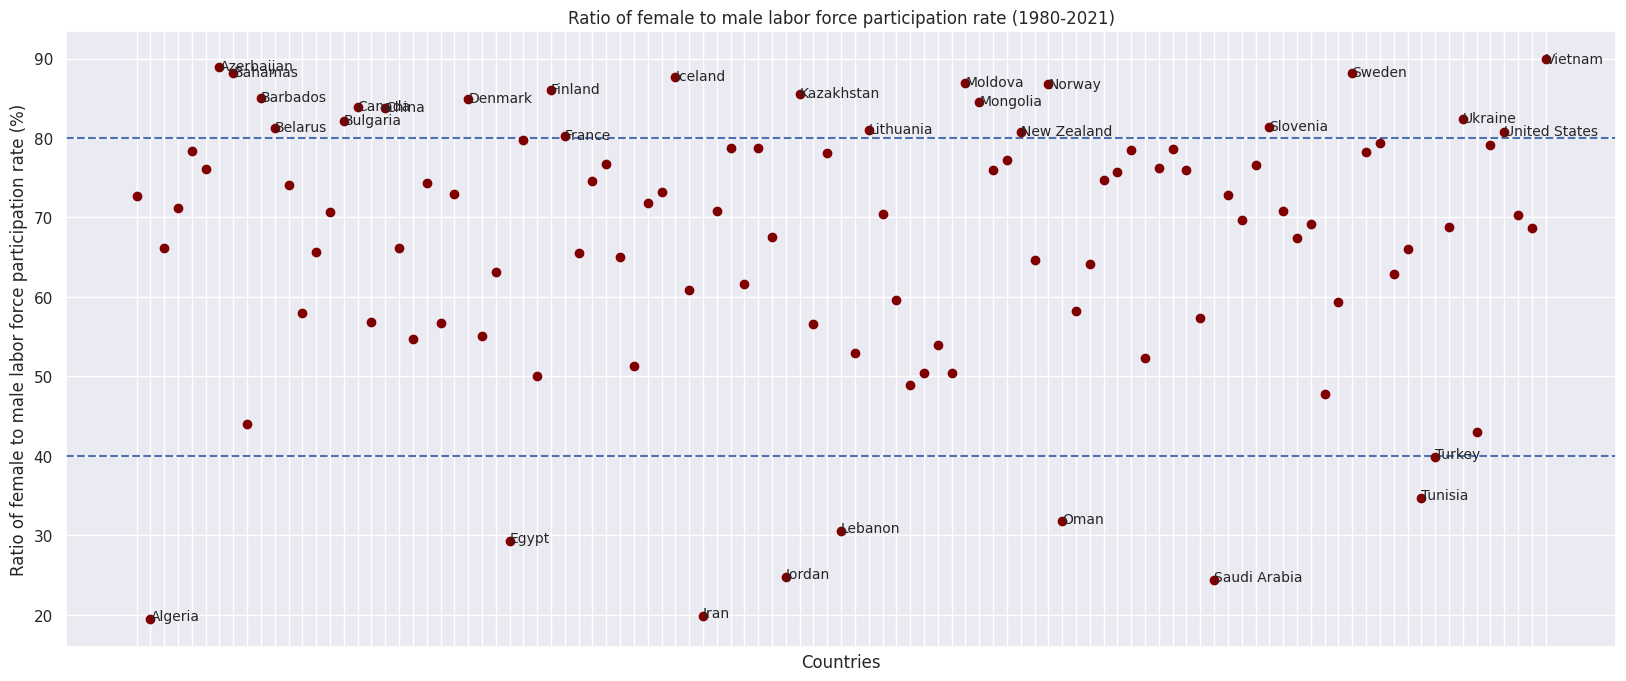

In [93]:
plt.figure(figsize=(20,8))
plt.title('Ratio of female to male labor force participation rate (1980-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=40, color='b', linestyle='--')
plt.axhline(y=80, color='b', linestyle='--')

for i in range(len(df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby('Entity').mean())):
    x = df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].name
    y = df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0]
    plt.plot(x, y, "o", color="maroon")
    if df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0] >= 80 or \
    df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].values[0] <= 40 :
        plt.text(x, y * (1 - 0.005), df_ratio_labor[['Entity','ratio_of_f_to_m_labor_force_participation_rate']].groupby(by='Entity').mean().iloc[i].name, fontsize=10)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Ratio of female to male labor force participation rate In Different Countries (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

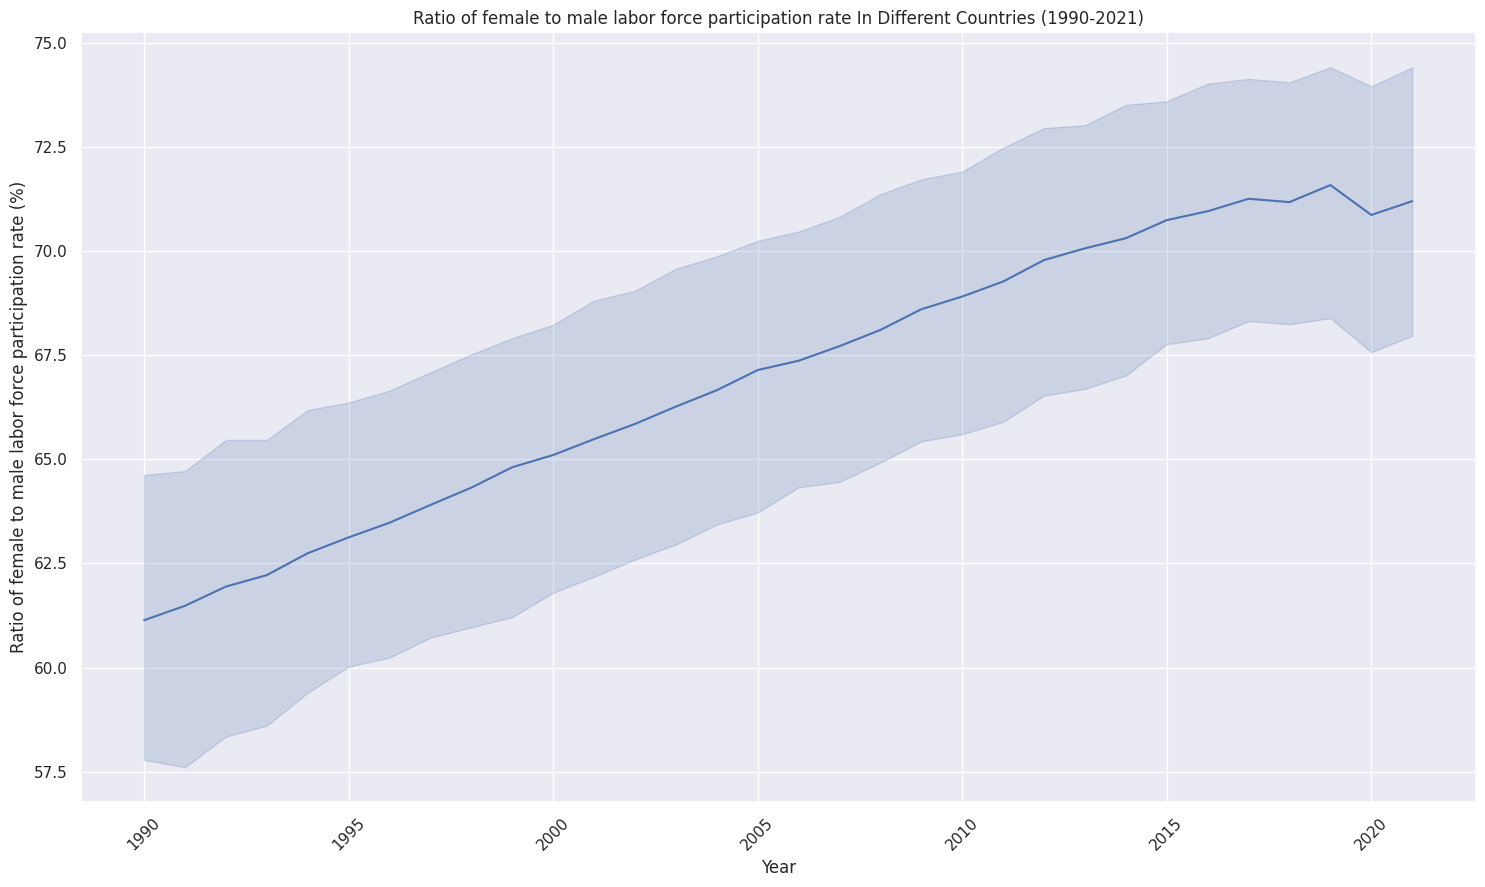

In [94]:
# In 2019-2020 rates dropped a little
# Probably because of COVID-19
# In between 1990-2020 female to male ratio is between 60-72 percent.
# For every 100 men 60 to 72 woman employed or looking for a job
# The ratio increased with time
# It is clear male labor force is greater than female labor force
plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Different Countries (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_ratio_labor,y="ratio_of_f_to_m_labor_force_participation_rate", x="Year")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Ratio of female to male labor force participation rate In Turkey (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

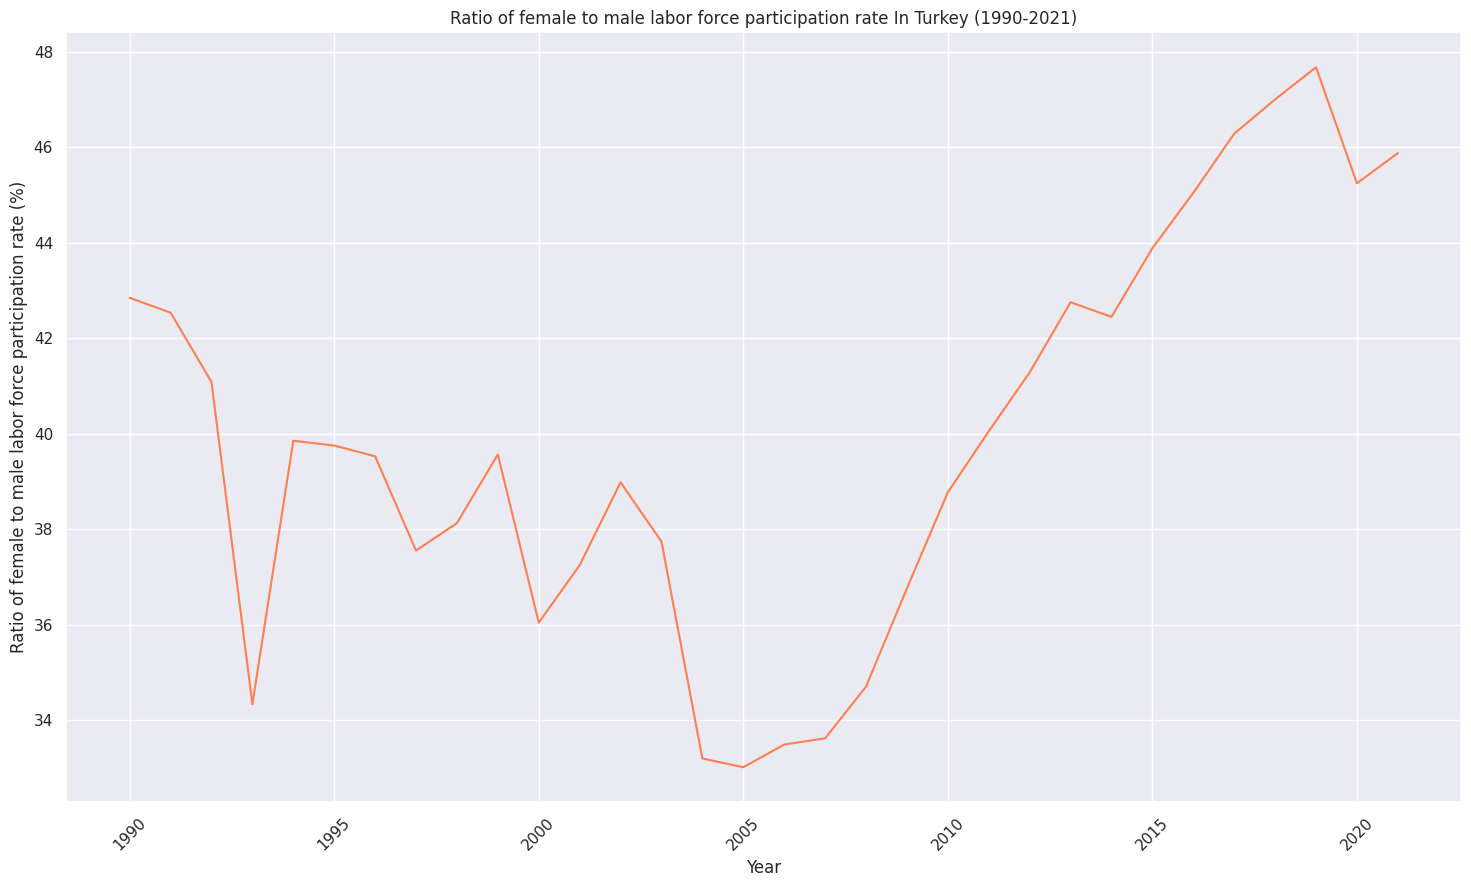

In [95]:
# We can say Turkey is below average with female labor participition compare the male
# After 2005 there is a clear increase
# Agan there is a little drop in 2019 due to COVID

plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Turkey (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_ratio_labor.query('Entity ==  "Turkey"'),y="ratio_of_f_to_m_labor_force_participation_rate", x="Year",
             color='coral')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: title={'center': 'Labour force_participation rate In Different Countries Female-Male (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

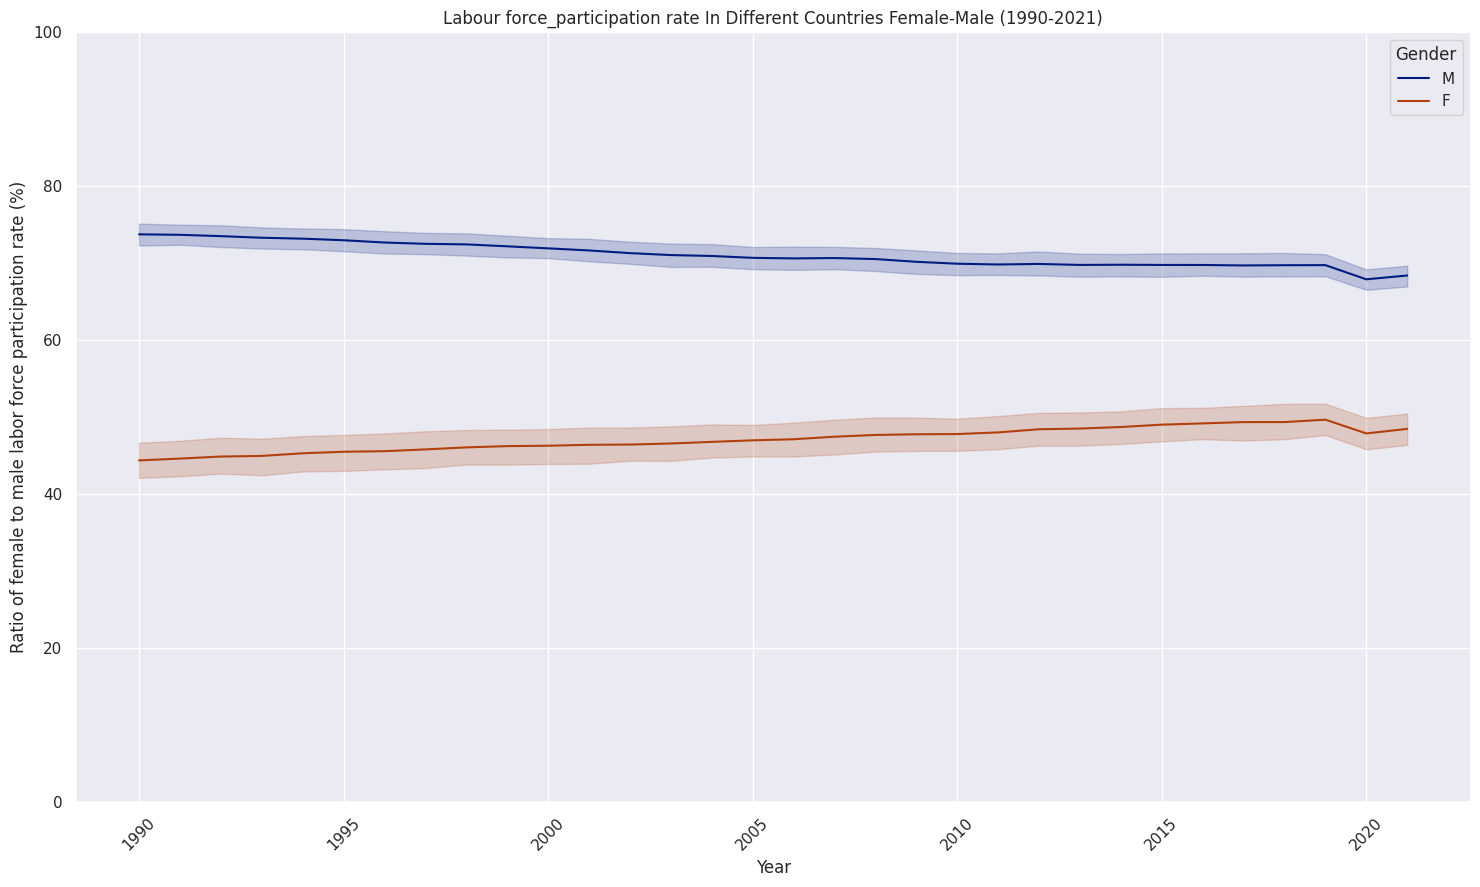

In [96]:
# There is a clear difference between male and female labor participation rates between the years 1990-2021
# The difference has become smaller withing the years
plt.figure(figsize=(18,10))
plt.title('Labour force_participation rate In Different Countries Female-Male (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.ylim(0,100)
plt.xlabel('Year')
plt.xticks(rotation=45)
sns.lineplot(data=df_labor_force,y="Labour_force_participation_rate", x="Year", hue='Gender',palette='dark',hue_order=['M','F'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: title={'center': 'Ratio of female to male labor force participation rate In Turkey (1990-2021)'}, xlabel='Year', ylabel='Ratio of female to male labor force participation rate (%)'>

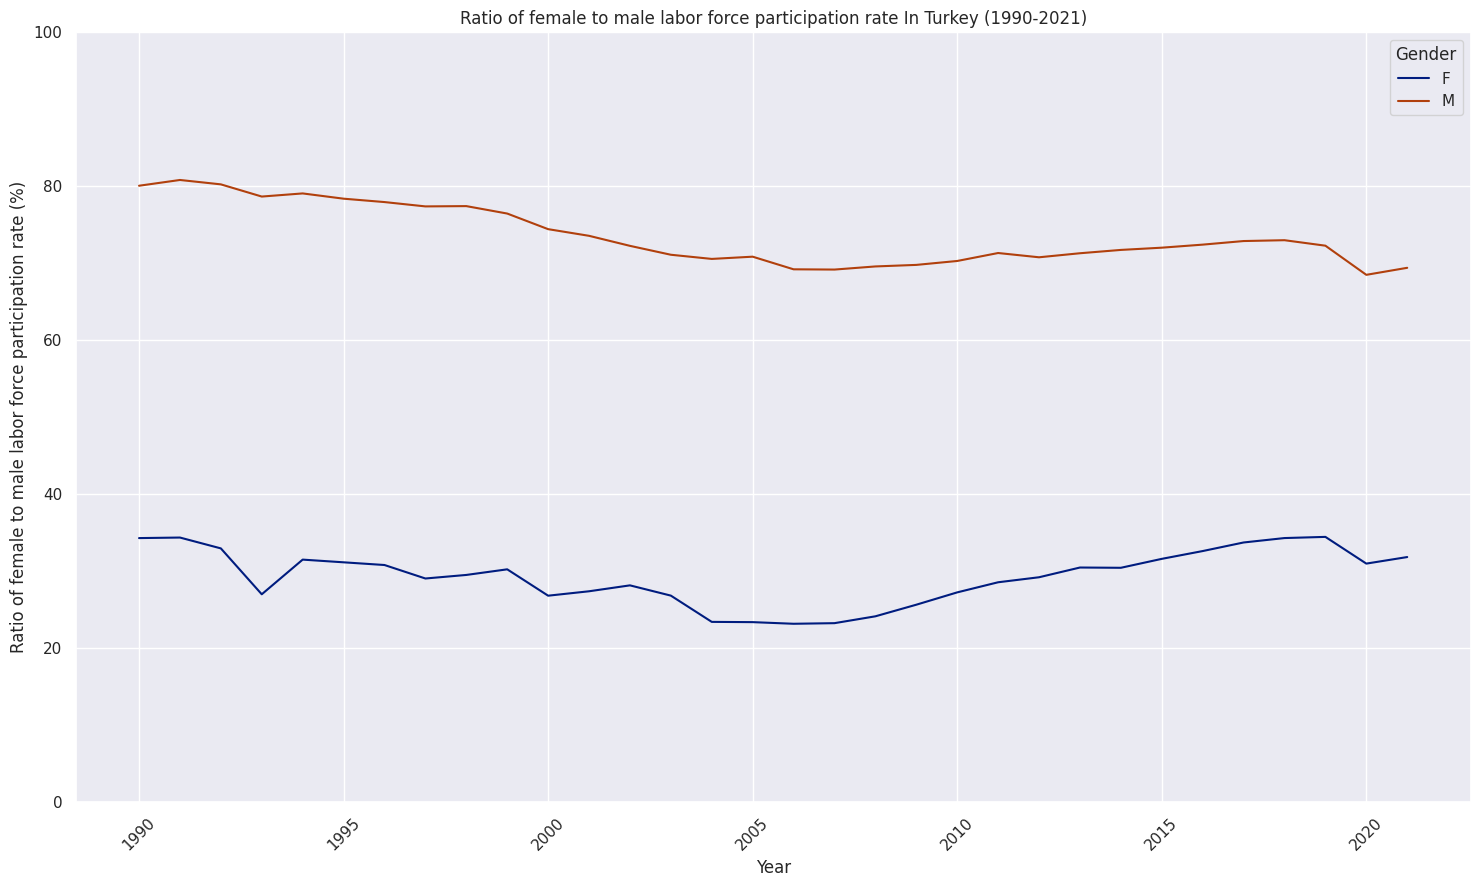

In [97]:
# The difference between even bigger in Turkey
# We can say Turkey is below average with female labor participition compare the male
plt.figure(figsize=(18,10))
plt.title('Ratio of female to male labor force participation rate In Turkey (1990-2021)')
plt.ylabel('Ratio of female to male labor force participation rate (%)')
plt.xlabel('Year')
plt.ylim(0,100)
plt.xticks(rotation=45)
sns.lineplot(data=df_labor_force.query('Country ==  "Turkey"'),y="Labour_force_participation_rate", x="Year",hue='Gender',
             palette='dark')


### Employment

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Ratio of female employment to population (1980-2021)'}, xlabel='Year', ylabel='ratio_of_female_employment_to_population'>

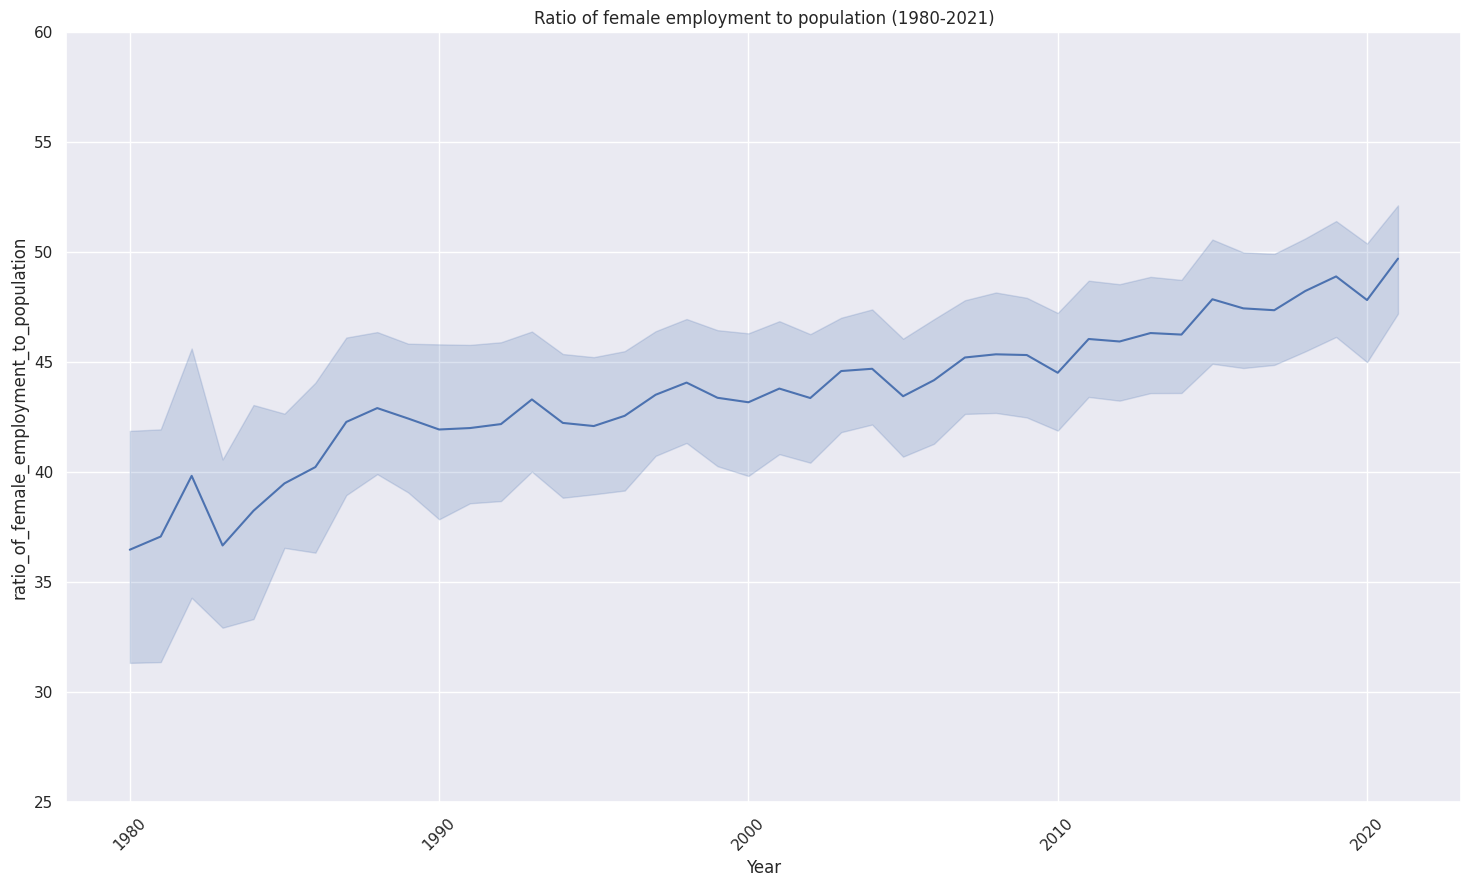

In [98]:
# Even the employment ratio increased with years it is still only half of the working age female population
plt.figure(figsize=(18,10))
plt.title('Ratio of female employment to population (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.xlabel('Year')
plt.ylim(25,60)
plt.xticks(rotation=45)
sns.lineplot(y=df_female_employmennt["ratio_of_female_employment_to_population"], x=df_female_employmennt["Year"])

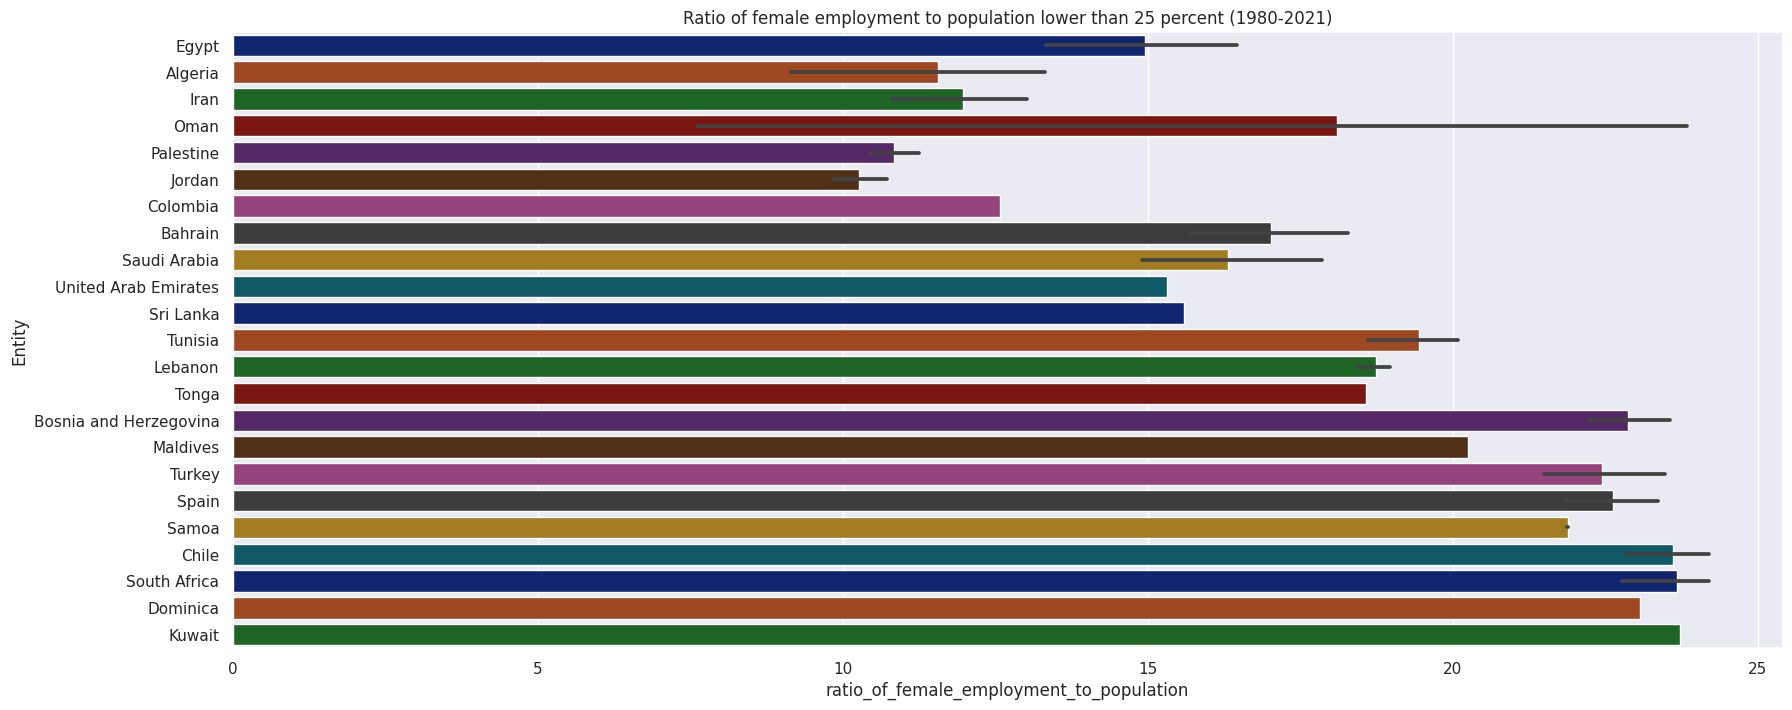

In [99]:
# The countries ratio of female employment to population is the least
# Turkey is one of them
# Iran, Algeria and Egypt has the least amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female employment to population lower than 25 percent (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.ylabel('Countries')
sns.barplot(data=df_female_employmennt.query('ratio_of_female_employment_to_population < 25 ').sort_values(by = ['ratio_of_female_employment_to_population'],ascending=True),
             y="Entity",
            x="ratio_of_female_employment_to_population",
            palette='dark'
            ,orient='h'
            
)
plt.show() 

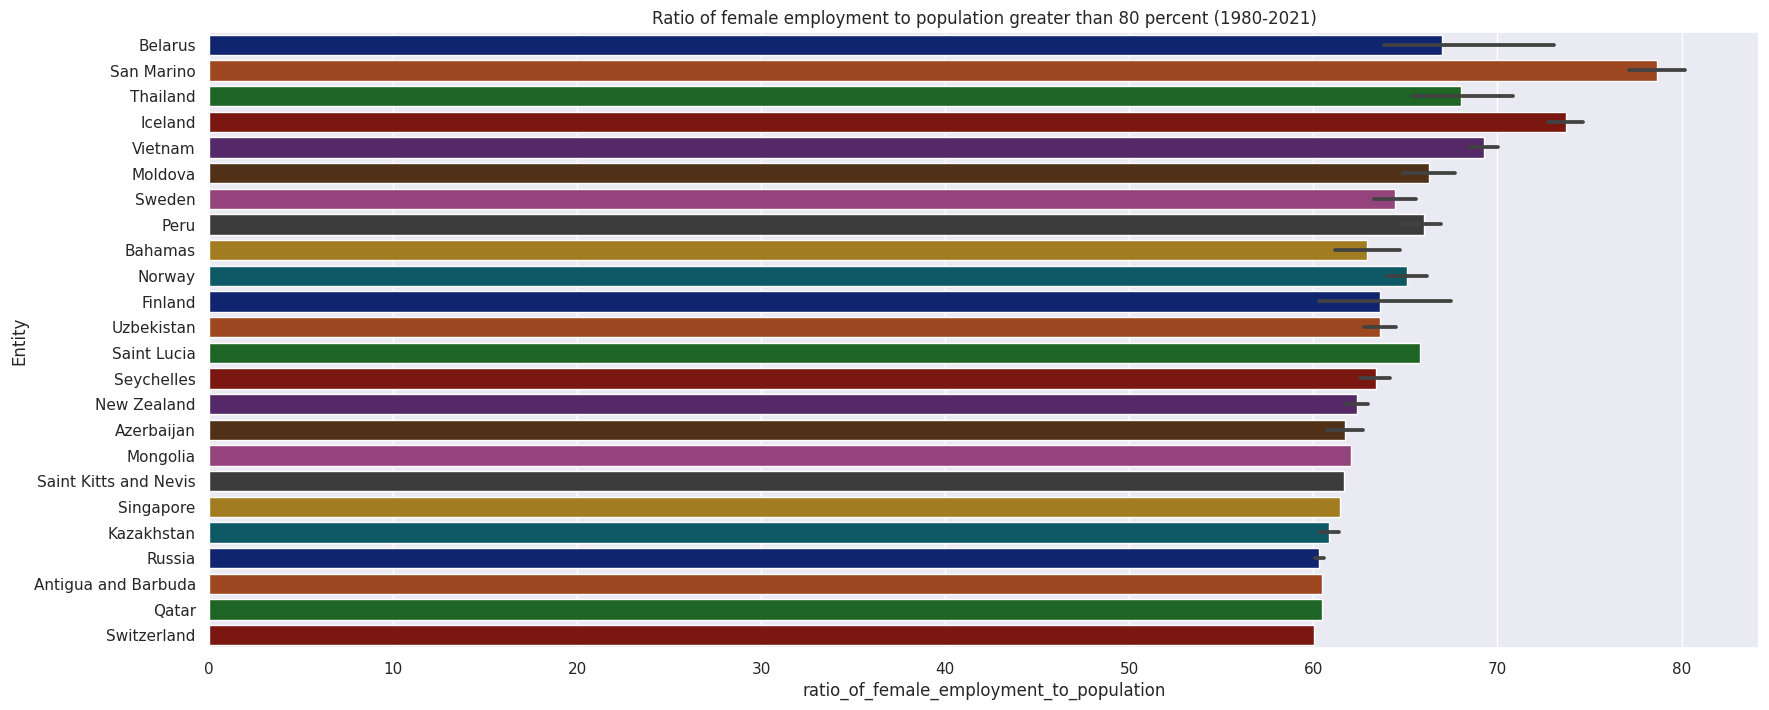

In [100]:
# The countries ratio of female employment to population is the most
# Belarus, San Marino and Thailand has the least amount
plt.figure(figsize=(20,8))
plt.title('Ratio of female employment to population greater than 80 percent (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.ylabel('Countries')
sns.barplot(data=df_female_employmennt.query('ratio_of_female_employment_to_population > 60 ').sort_values(by = ['ratio_of_female_employment_to_population'],ascending=False),
             y="Entity",
            x="ratio_of_female_employment_to_population",
            palette='dark'
            ,orient='h'
            
)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Ratio of female employment to population in Turkey (1980-2021)'}, xlabel='Year', ylabel='ratio_of_female_employment_to_population'>

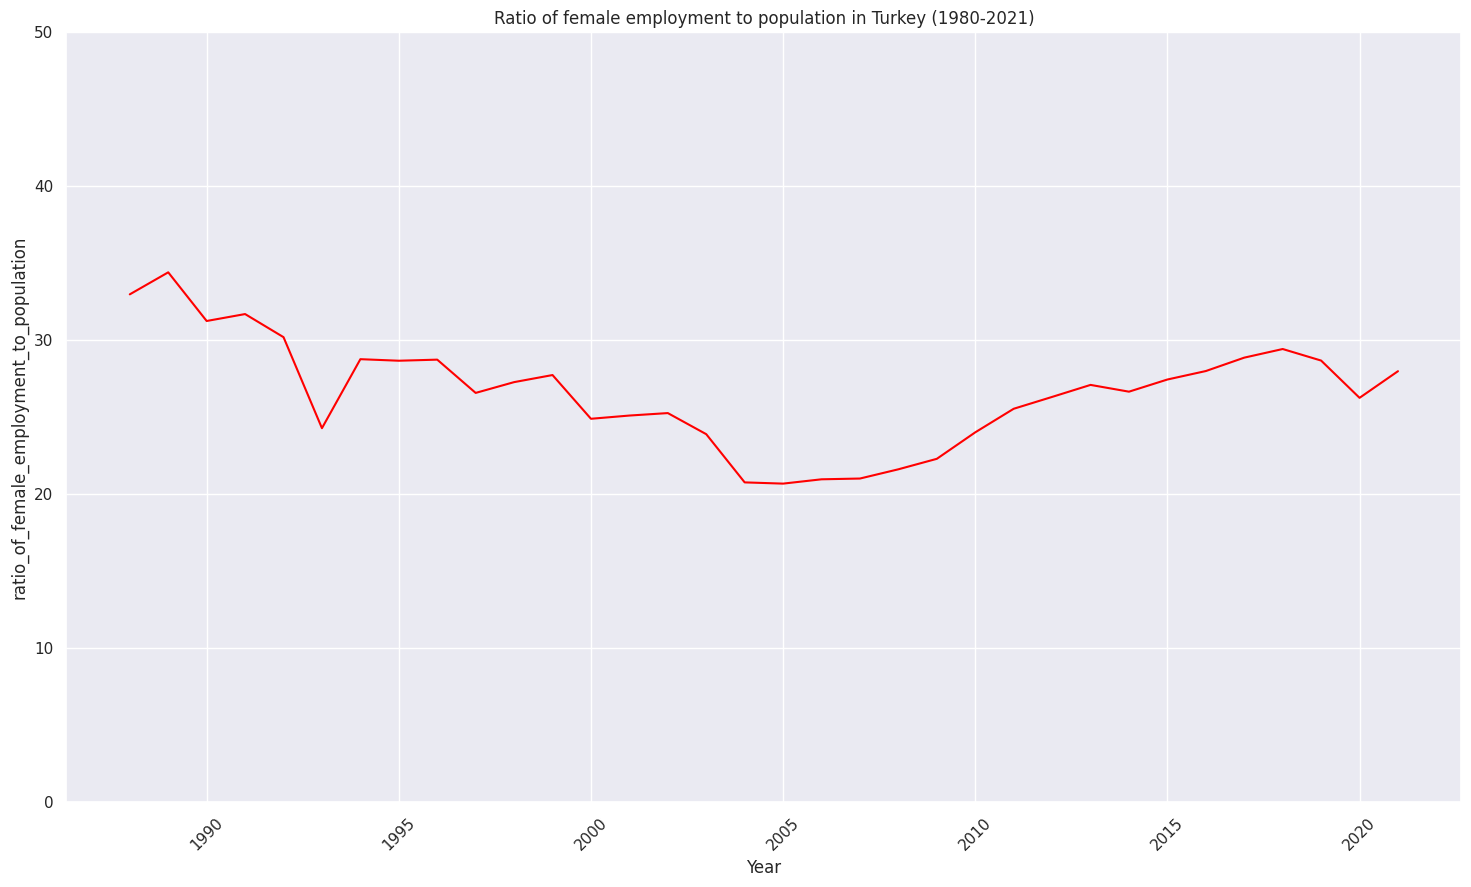

In [101]:
# The ratio even lower in Turkey (between 25-30 percent)
# We can say Turkey is below average with ratio of female employment to population
plt.figure(figsize=(18,10))
plt.title('Ratio of female employment to population in Turkey (1980-2021)')
plt.xlabel('Ratio of female employment to population (%)')
plt.xlabel('Year')
plt.ylim(0,50)
plt.xticks(rotation=45)
sns.lineplot(data=df_female_employmennt.query('Entity ==  "Turkey"'),y="ratio_of_female_employment_to_population", x="Year",
             color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

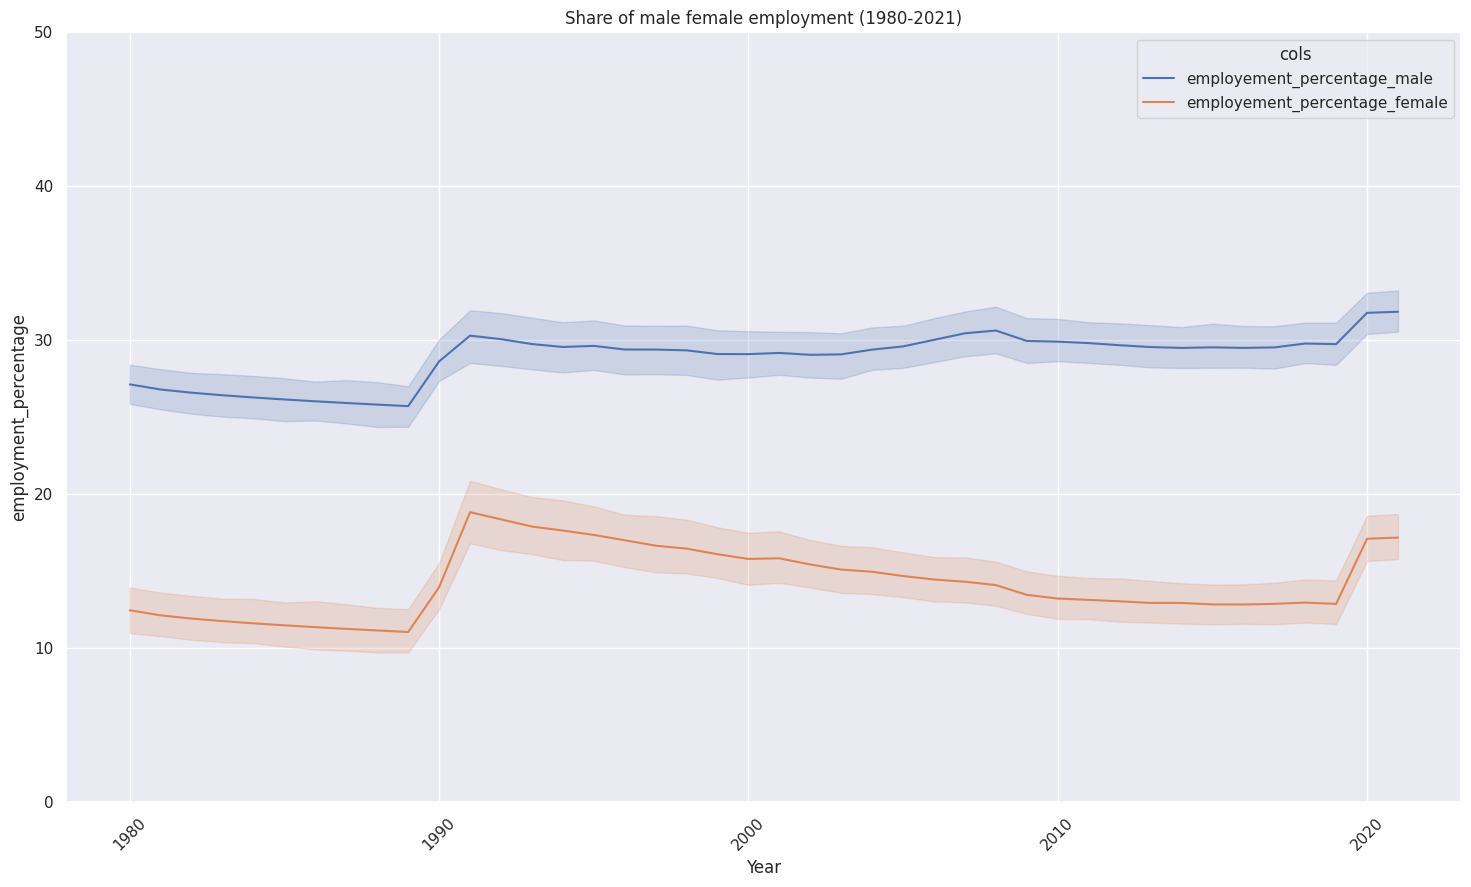

In [102]:
# There is a clear difference between women and men employment
# In 1990 there is a steep increase in women employment
# After 1990 women employment percentage lowered while man emloyment was approximately stayed the same until 2019
# Both men and women employment increased in 2019 (probably due to Covid) but women employment increased more than men
# But still women employment didn't reach the level of 1990
# The difference between employement didn't change linearly with time
plt.figure(figsize=(18,10))
plt.title('Share of male female employment (1980-2021)')
plt.xlabel('Share of male female employment (%)')
plt.xlabel('Year')
plt.ylim(0,50)
plt.xticks(rotation=45)
dfm = df_share_of_male_female_employment[['Year','employement_percentage_male','employement_percentage_female']].melt('Year', var_name='cols', value_name='employment_percentage')
sns.lineplot(x="Year", y="employment_percentage", hue='cols', data=dfm,color='Red')
plt.show()

### Gender Wage Gap 

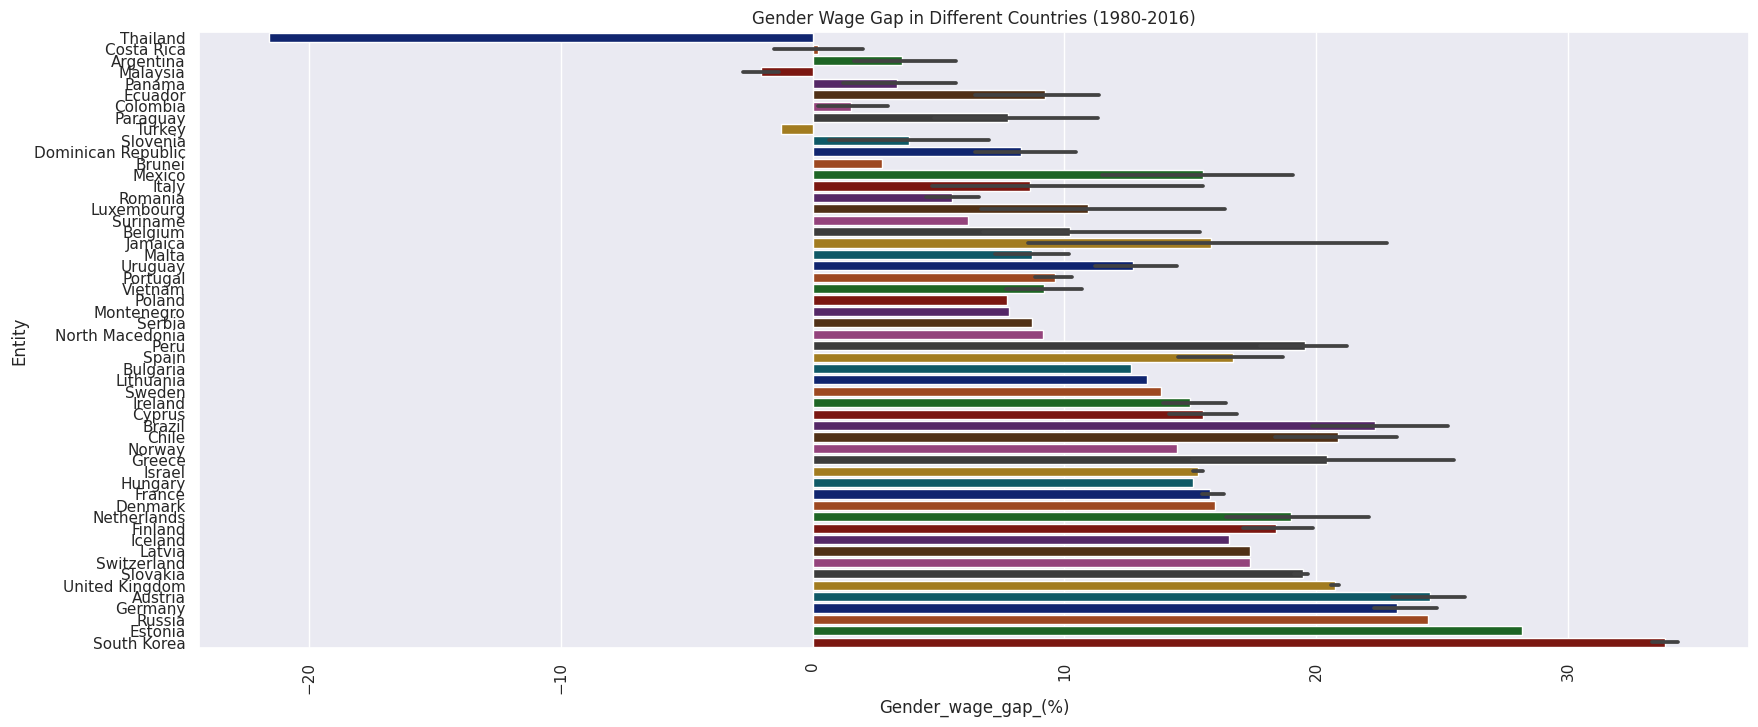

In [103]:
# Almost all countries in the data has positive gender wage gap disadventeging women
# Thailand is very different from other countries by about -25% gender wage gap
# South Korea has the biggest gender wage gap about 37%
plt.figure(figsize=(20,8))
plt.title('Gender Wage Gap in Different Countries (1980-2016)')
plt.xlabel('Gender Wage Gap (%)')
plt.ylabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_gender_wage.sort_values(by ='Gender_wage_gap_(%)'),
             y="Entity",
            x="Gender_wage_gap_(%)",
            palette='dark'
            ,orient='h'
            
)
plt.show()

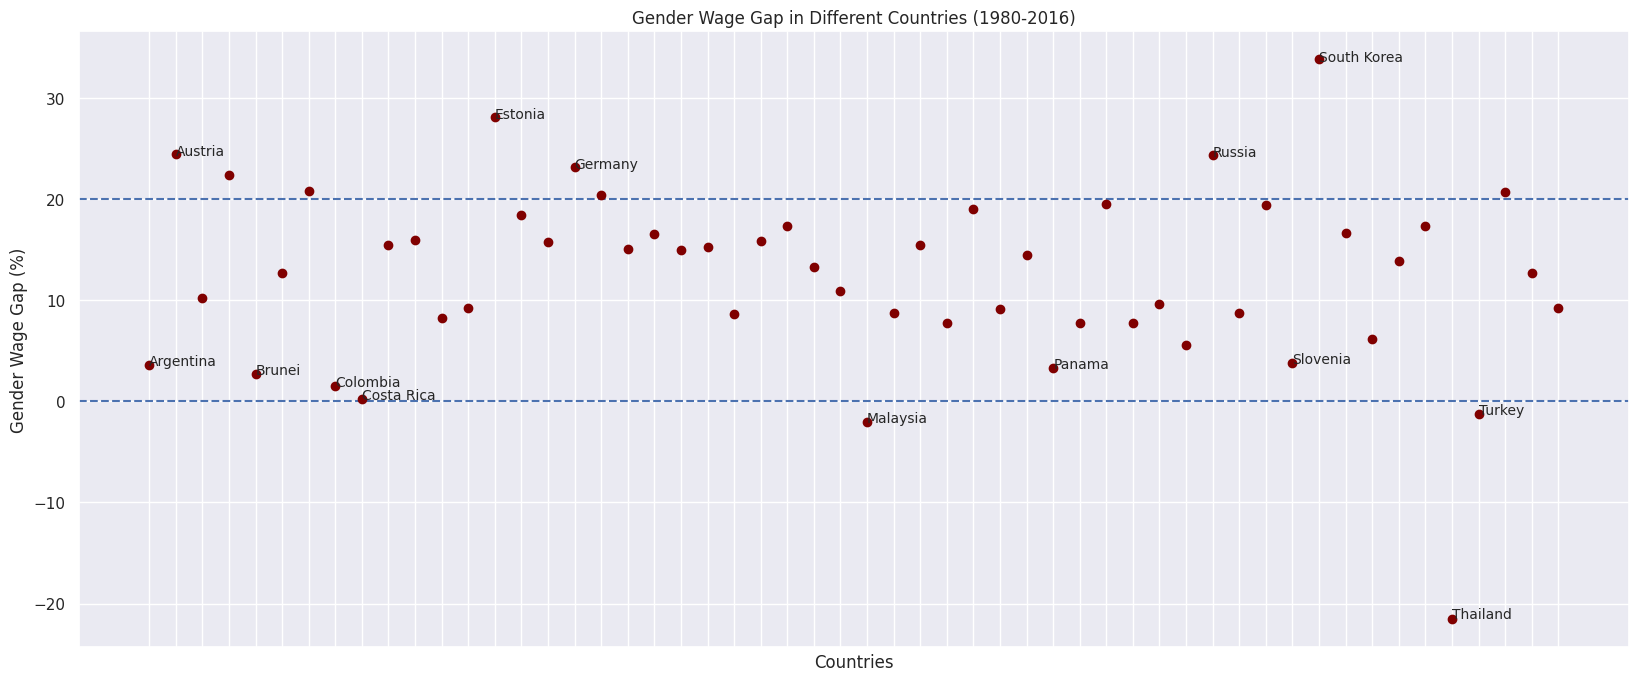

In [104]:
# Turkey,Malaysia,Costa Rica have almost equal gender wage gap
# South Korea, Estonia, Austria has the most gender wage gap disadventiging women
# Thailand has the most gender wage gap disadventiging men
plt.figure(figsize=(20,8))
plt.title('Gender Wage Gap in Different Countries (1980-2016)')
plt.ylabel('Gender Wage Gap (%)')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=0, color='b', linestyle='--')
plt.axhline(y=20, color='b', linestyle='--')

for i in range(len(df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby('Entity').mean())):
    x = df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].name
    y = df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].values[0]
    plt.plot(x, y, "o", color="maroon")
    if df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].values[0] >= 23 or \
    df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].values[0] <= 5:
        plt.text(x, y * (1 - 0.005), df_gender_wage[['Entity','Gender_wage_gap_(%)']].groupby(by='Entity').mean().iloc[i].name, fontsize=10)
plt.show()

<Axes: xlabel='Year', ylabel='Gender_wage_gap_(%)'>

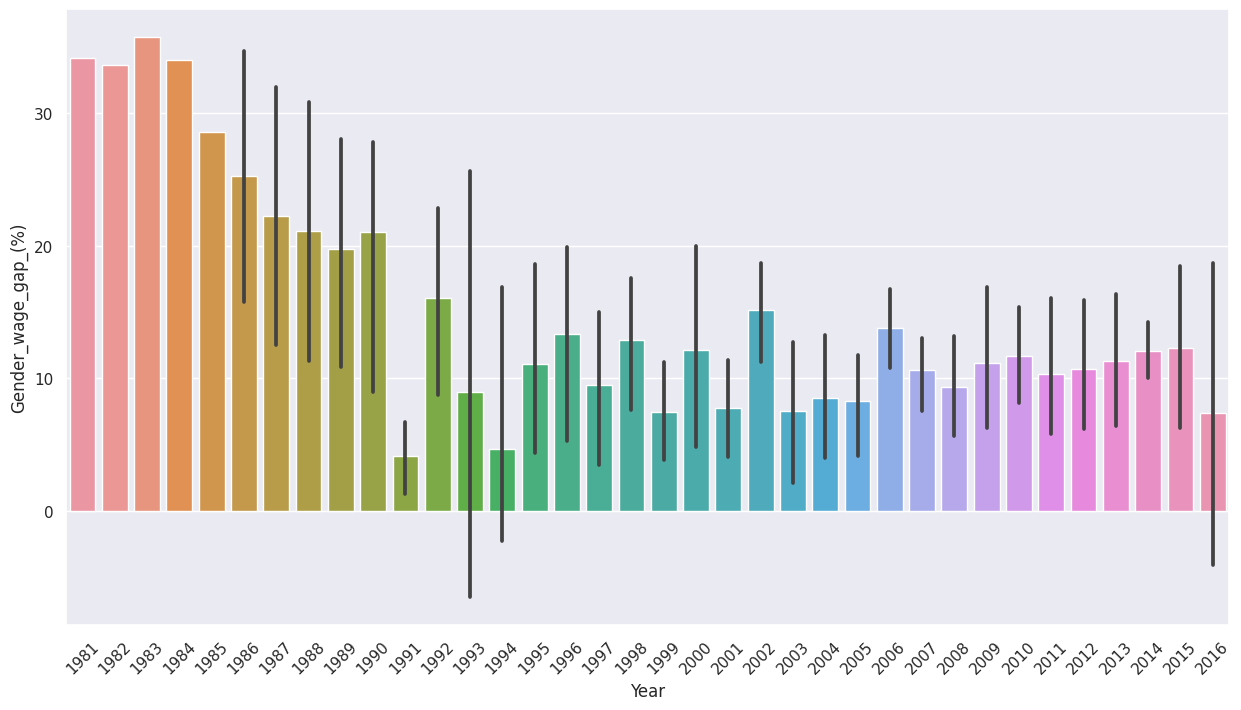

In [105]:
# We can see again in 1990 there is a sharp decrease in gender wage gap
# After 1990 it has up and downs but it hasn't reach the 1990 gender wage gap again
# After 1990 it is below 20 percent generally
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=45)
sns.barplot(df_gender_wage, x="Year", y="Gender_wage_gap_(%)")



### Female to Male Ratio of Time Devoted to Unpaid Care Work

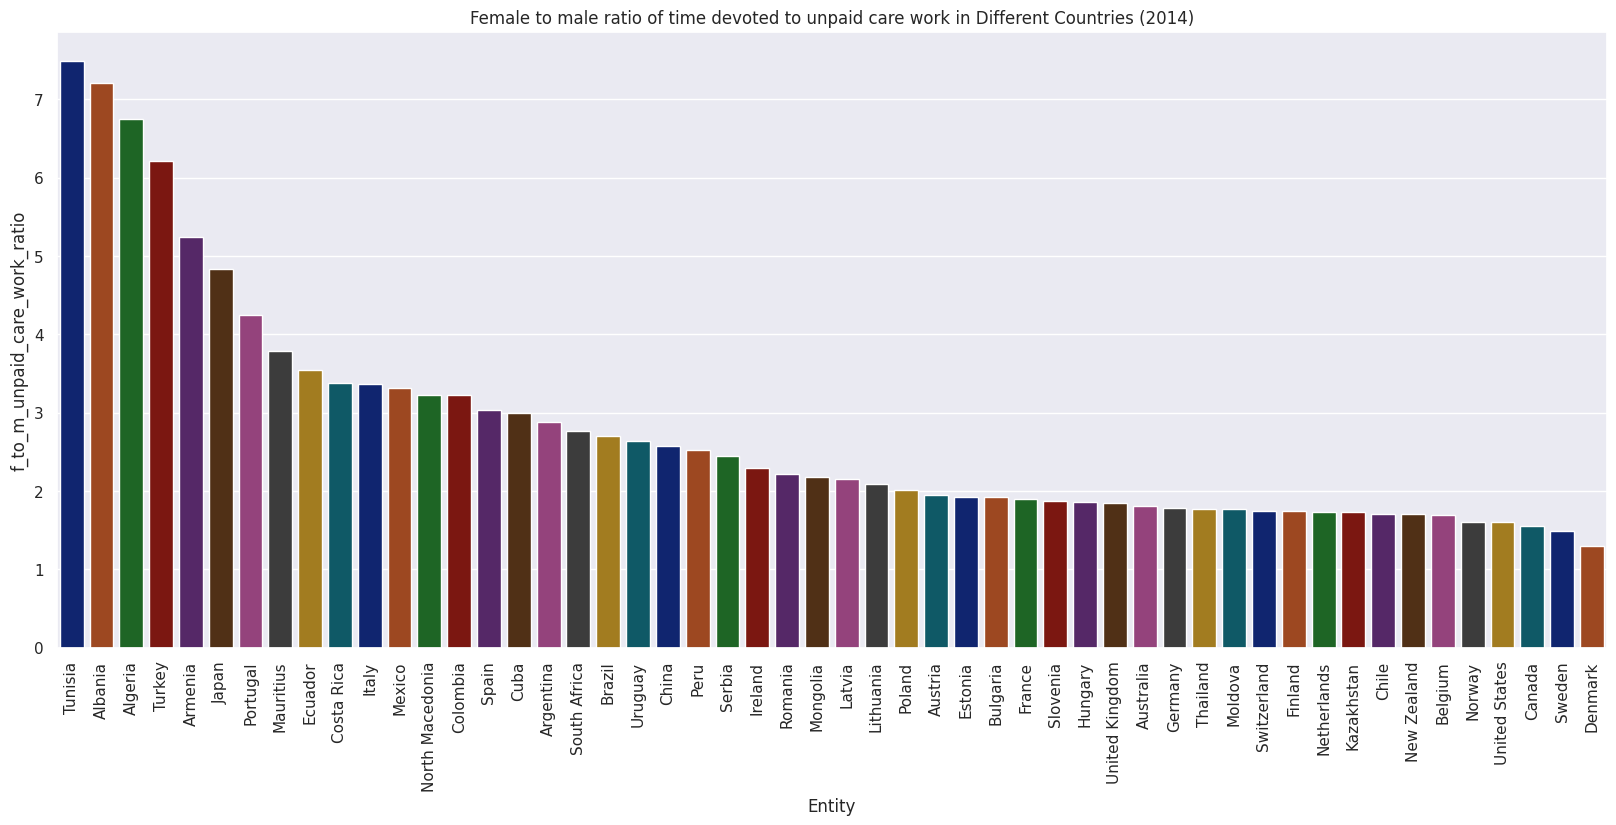

In [106]:
# Most of the countries have about 2-3 ratio
# Women generally spend 2-3 times more hours per day on unpaid care work
# Tunisia, Albania, Algeria has the biggest ratio and Denmark, Sweden, Canada has the smallest ratio
plt.figure(figsize=(20,8))
plt.title('Female to male ratio of time devoted to unpaid care work in Different Countries (2014)')
plt.ylabel('Female to male ratio')
plt.xlabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_unpaid_care_work.sort_values(by = ['f_to_m_unpaid_care_work_ratio'],ascending=False), x="Entity", y="f_to_m_unpaid_care_work_ratio",palette='dark')
plt.show()

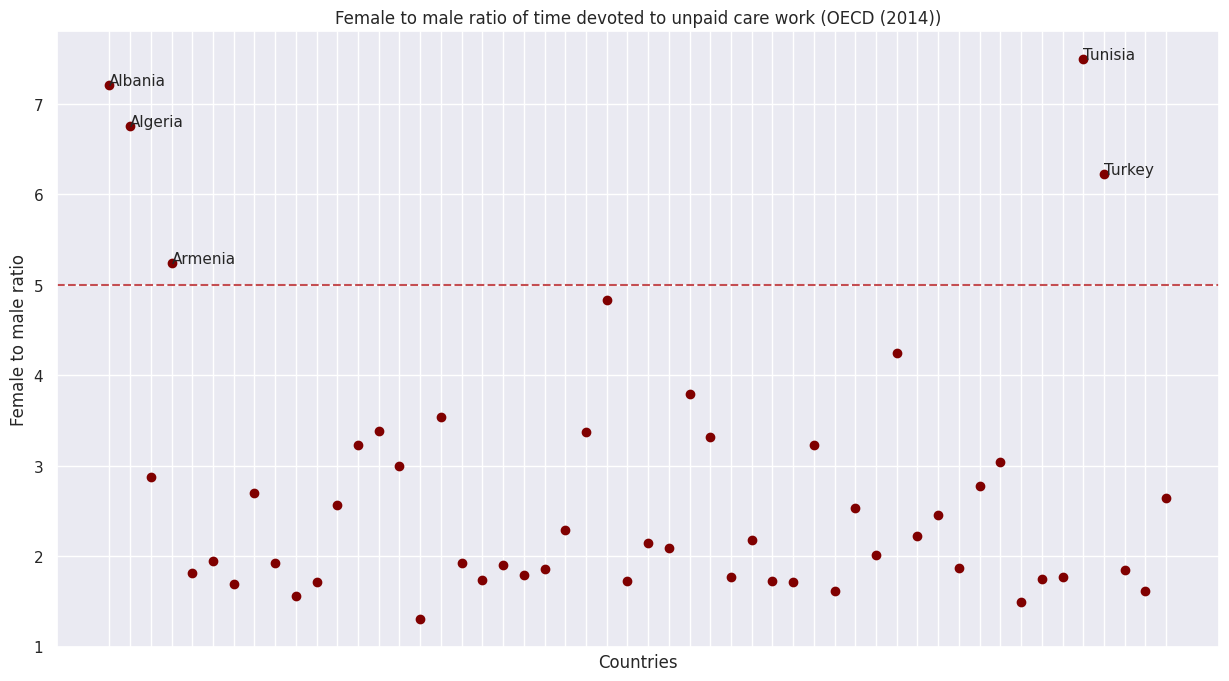

In [107]:
# Tunisia, Albania, Algeria, Turkey, Armenia has the biggest ratio with between 5 to 8 hours a day
plt.figure(figsize=(15,8))
plt.title('Female to male ratio of time devoted to unpaid care work (OECD (2014))')
plt.ylabel('Female to male ratio')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=5, color='r', linestyle='--')
for i in range(len(df_unpaid_care_work)):
    x = df_unpaid_care_work['Entity'][i]
    y = df_unpaid_care_work['f_to_m_unpaid_care_work_ratio'][i]
    plt.plot(x, y, "o", color="maroon")
    if df_unpaid_care_work['f_to_m_unpaid_care_work_ratio'][i] >= 5:
        plt.text(x, y * (1 - 0.00005), df_unpaid_care_work['Entity'][i], fontsize=11)
plt.show()

### Fertility Rate - Labor Force Participation Rate

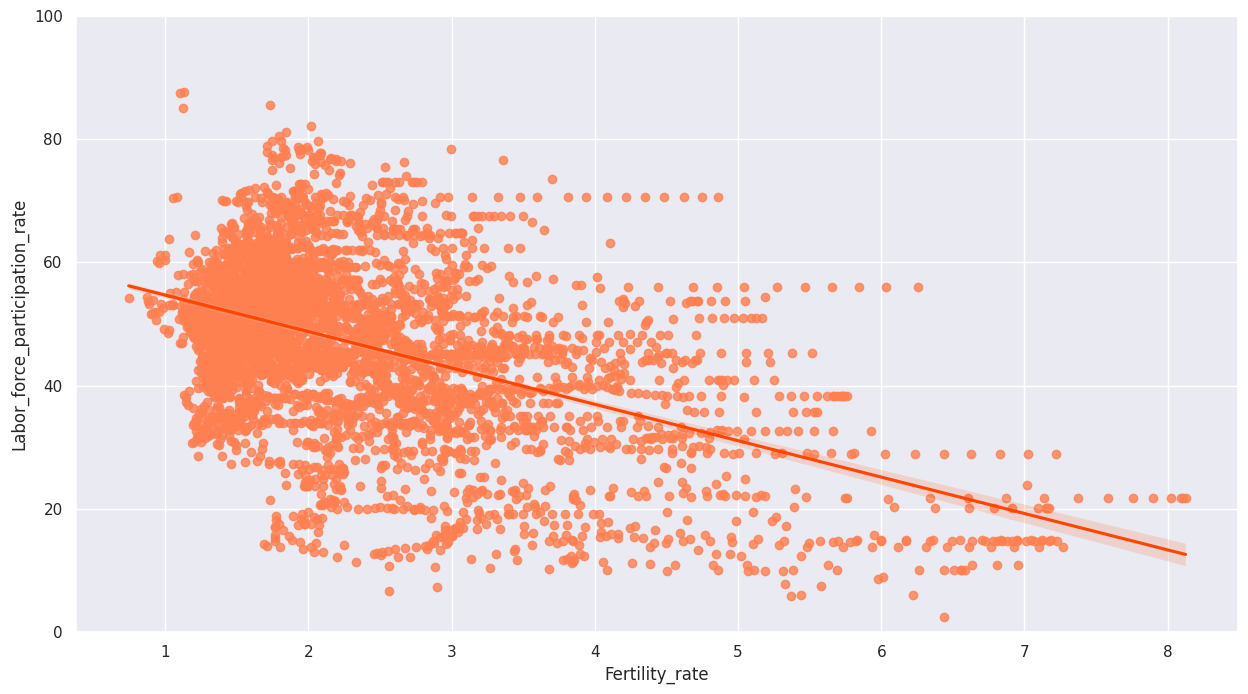

In [108]:
# We can see the negative relation with fertility rate and labor force participation rate
plt.figure(figsize=(15,8))
sns.regplot(data=df_fertility,
                x="Fertility_rate",
                y="Labor_force_participation_rate",
                color='coral',
                line_kws=dict(color="orangered")
            
            
                
                )
plt.ylim(0,100)
plt.show()

[Text(0, 0.5, 'Year'),
 Text(0, 1.5, 'Labor_force_part'),
 Text(0, 2.5, 'Fertility'),
 Text(0, 3.5, 'Population')]

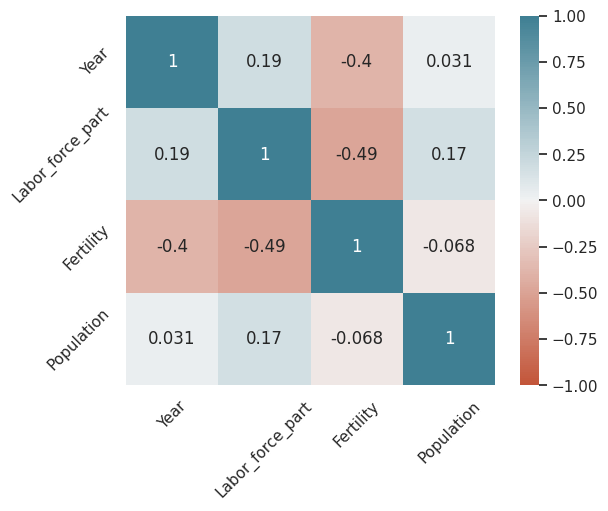

In [109]:
# We can see there is a negative relationship between labor force participation rate and fertility rate
matrix = df_fertility[['Year', 'Labor_force_participation_rate',
       'Fertility_rate', 'Population'
    ]].corr()
matrix
ax = sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values,
             cmap=sns.diverging_palette(20, 220, n=200),
            vmin=-1,
            vmax=1,
            square=True,
            annot=True
            )
ax.set_xticklabels(['Year', 'Labor_force_part', 'Fertility', 'Population'], rotation=45)
ax.set_yticklabels(['Year', 'Labor_force_part', 'Fertility', 'Population'], rotation=45)

 ### A Woman Can Get a Job In The Same Way As a Men

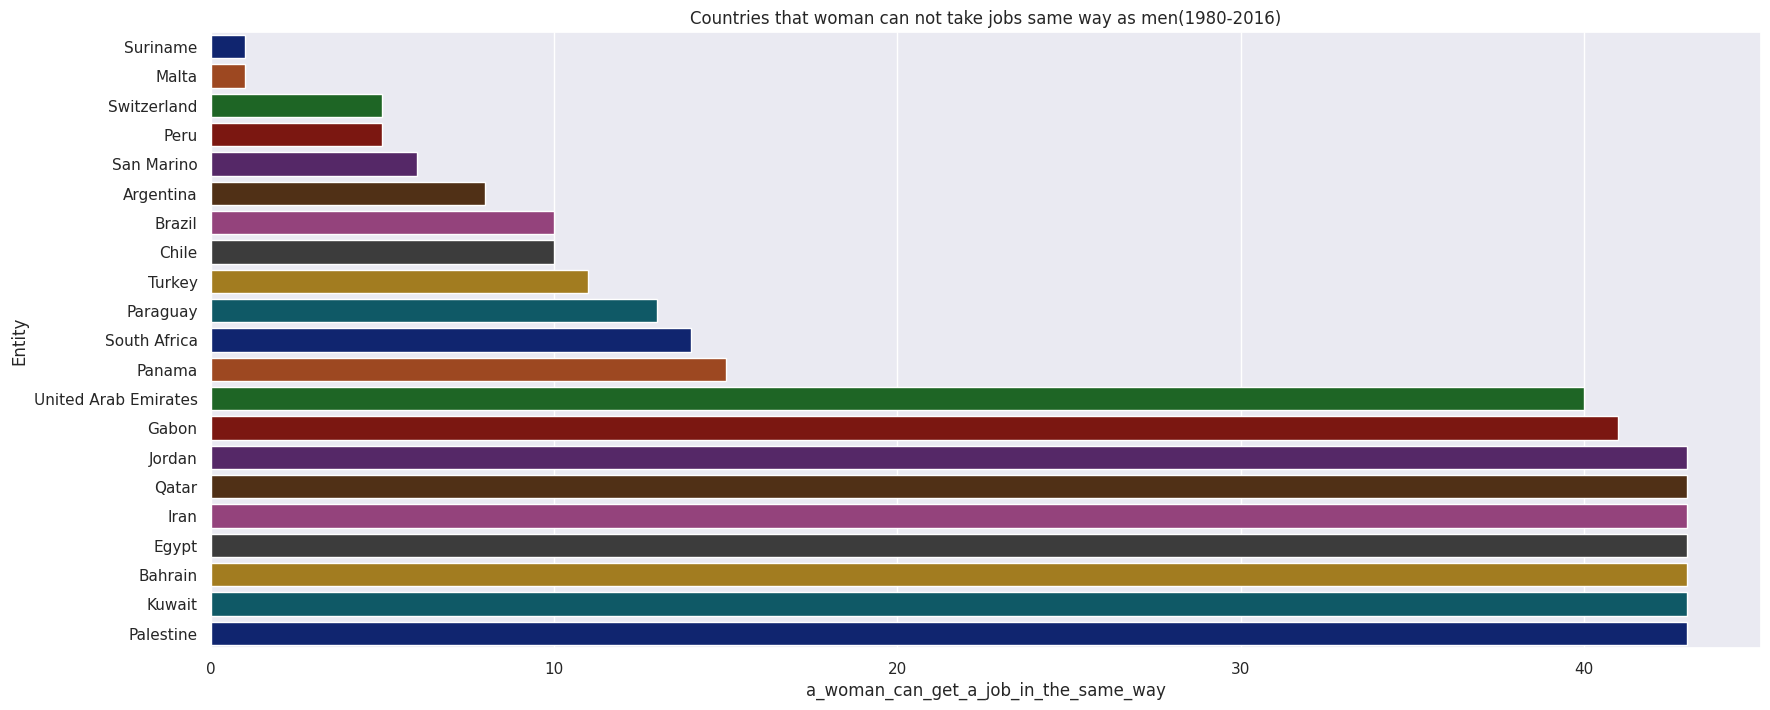

In [110]:
# In Palestine, Kuwait, Bahrain, Egypt, Iran, Qatar, Jordan from 1980 to 2016 women legally cant take some jobs same way as a man
# These countries all in Middle East
# Turkey also one of the countries but we can see that changed in some years
plt.figure(figsize=(20,8))
plt.title('Countries that woman can not take jobs same way as men(1980-2016)')
plt.ylabel('Countries')
plt.xlabel('Count')
sns.barplot(data=df_woman_can_get_same_jobs.query('a_woman_can_get_a_job_in_the_same_way == 0').groupby('Entity',as_index=False).count().sort_values(by = ['a_woman_can_get_a_job_in_the_same_way']),
            y="Entity",
            x="a_woman_can_get_a_job_in_the_same_way",
            palette='dark',
            orient='h'
            
)
plt.show()